# **Descripción del proyecto**
Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

### **Descripción de los datos**
El conjunto de datos contiene los siguientes datos:
* price
* model_year
* model
* condition
* cylinders
* fuel — gasolina, diesel, etc.
* odometer — el millaje del vehículo cuando el anuncio fue publicado
* transmission
* paint_color
* is_4wd — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
* date_posted — la fecha en la que el anuncio fue publicado
* days_listed — desde la publicación hasta que se elimina

EL ``objetivos del proyecto`` consiste en estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo. 

Para ello realizaremos lo siguiente:
* Identificar y estudiar los valores ausentes.
* Convertir los datos en los tipos necesarios.
* Crearemos dos columnas con la antiguedad del vehículo (edad) y la media de millaje del vehículo por año.
* Crearemos nuevas columnas con los días de la semana, mes y año en el que el anuncio se colocó.
* En la columna ``condition``, reemplaza los valores de cadena con una escala numérica:
    * nuevo = 5
    * como nuevo = 4
    * excelente = 3
    * bien = 2
    * bastante = 1
    * para rescate = 0
* Trazaremos histogramas y gráficos de caja para cada uno de los parámetros y estudiaremos cómo los valores atípicos afectan a la forma y legitimidad de los gráficos.
* Determinaremos los límites superiores de los valores atípicos y los eliminaremos guardandolos en un nuevo dataframe.
* Utilizaremos los datos filtrados para plantear nuevos histogramas y los compararemos con los histogramas anteriores (aquellos con los valores atípicos incluidos).
* Calcularemos la media y la mediana de los días publicados de un anuncio. Además describiremos la vida útil habitual de un anuncio y determinaremos cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.
* Analizaremos el número de anuncios y el precio medio para cada tipo de vehículo. Trazaremos un gráfico mostrando la dependencia de los números de anuncios en cada tipo de vehículo y seleccionaremos los dos tipos con un mayor número de anuncios.
* Finalmente analizaremos los factores que más impactan sobre el precio tomando como ejemplo los tipos más populares de vehículos (aquellos con más anuncios) y estudiaremos si el precio depende de la edad, millaje, condición, tipo de transmisión y color del vehículo. Para las variables categóricas (tipo de transmisión, condición y color), trazaremos gráficos de caja y bigotes, y crearemos gráficos de dispersión para las variables numéricas. También crearemos matrices de dispersión y correlación. Cuando analicemos las variables categóricas, solo tomaremos en cuenta quellas que tengan al menos 50 anuncios; si no, nuestros parámetros no serán válidos para el análisis.

In [ ]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    vehicles = pd.read_csv('vehicles_us.csv', sep=',')
except:
    vehicles = pd.read_csv('/datasets/vehicles_us.csv', sep=',')

#mostramos las primeras 10 filas
vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
#mostramos la información general
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
#verificamos si hay duplicados
vehicles.duplicated().sum()

0

In [ ]:
#mostramos una descripción de nuestros datos
vehicles.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Observamos en el conjunto de datos los siguientes problemas:
1. Existen 05 columnas con valores nulos: 
 - `model_year`, `cylinders`, `odometers`, `paint_color` y `is_4wd` siendo la columna `is_4wd` la que tiene más cantidad de valores nulos
 
2. Tipos de datos:
 - La columna `date_posted` es de tipo 'object' y no de tipo 'fecha'
 - La columna `cylinders` debe ser del tipo entero ya que no existen vehículos de 4.5 cilndros o 8.3 cilindros, etc.
 - La columna `is_4wd` debe ser de tipo entero por ser un valor booleano
 - La columna `model_year` debe ser de tipo fecha

## 1. Vamos a trabajar los valores ausente

In [ ]:
#mostramos solo los valores ausentes de model_year
vehicles[vehicles['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [ ]:
#mostramos solo los valores ausentes de cylinders
vehicles[vehicles['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [ ]:
#mostramos solo los valores ausentes de odometer
vehicles[vehicles['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [ ]:
#mostramos solo los valores ausentes de paint_color
vehicles[vehicles['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [ ]:
#mostramos solo los valores ausentes de is_4wd
vehicles[vehicles['is_4wd'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [ ]:
#vemos si hay alguna correlación inicial
vehicles.corr(numeric_only=True)

#Alternativamente, puede eliminar la advertencia temporalmente agregando el siguiente código antes de la llamada corr():
# import warnings
# warnings.filterwarnings("ignore", message="The default value of numeric_only in DataFrame.corr is deprecated")

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


De las 05 tablas mostradas arriba y de la tabla de correlación, no se observa algún patrón entre los valores nulos ni tampoco un patrón con los valores de las otras columnas.

Mostraremos los nulos en un gráfico de barras.

<AxesSubplot: title={'center': 'Cantidad de valores nulos'}, ylabel='amount'>

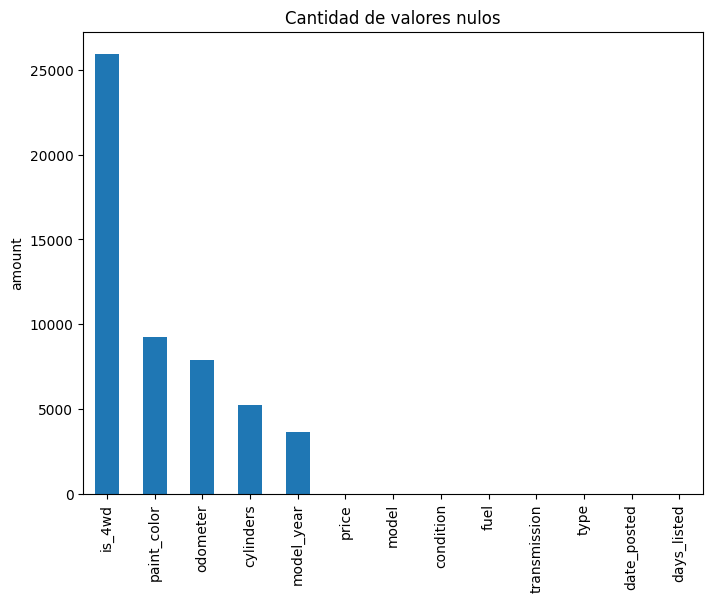

In [ ]:
#hacemos un histograma para ver como se distribuyen los nulos
vehicles.isna().sum().sort_values(ascending=False).plot(kind='bar', title='Cantidad de valores nulos', ylabel='amount', figsize=(8,6))

Se observa que la columna `is_4wd`, que representa si el vehículo tiene o no tracción, cuenta con más de 25 000 valores nulos.

In [ ]:
#mostramos los valores únicos de las columnas con valores faltantes
print(vehicles.is_4wd.unique())
print()
print(vehicles.paint_color.unique())
print('')
print(vehicles.odometer.unique())
print('')
print(vehicles.cylinders.unique())
print()
print(vehicles.model_year.sort_values().unique())

[ 1. nan]

[nan 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']

[145000.  88705. 110000. ... 121778. 181500. 139573.]

[ 6.  4.  8. nan  5. 10.  3. 12.]

[1908. 1929. 1936. 1948. 1949. 1954. 1955. 1958. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]


Observamos que:
1. la columna `is_4wd` no tiene el valor booleano '0' por lo que es probable que los valores nulos representen que los vehículos no tienen tracción.
2. Para el caso de la columna `paint_color` observamos que hay 07 tipos diferentes de color de vehículos y algunos que no ha sido posible identificar el color. Esto puede deberse al año de antiguedad del vehículo.
3. Respecto al `odometer` es posible que no haya registros también por la antiguedad del vehículo o por un olvido en el ingreso de los datos.
4. Respecto a los `cylinders` es probable que haya habido un error humano y se olvidaron de colocar los cilindros ya que todo vehículo tiene cilindros.
5. Respecto al `model_year` observamos que los años de modelo son consecutivos desde 1960. No podemos saber, aunque sea con la mínima certeza, a que año pertenecen los valores nulos.

In [ ]:
#calculamos el porcentaje que representa los valores nulos de la columna is_4wd
print('Porcentaje de nulos de la columna is_4wd: ', vehicles.is_4wd.isna().sum()/len(vehicles)) 
print()
#calculamos el porcentaje que representa los valores nulos de la columna paint_color
print('Porcentaje de nulos de la columna paint_color: ',vehicles.paint_color.isna().sum()/len(vehicles)) 
print()
#calculamos el porcentaje que representa los valores nulos de la columna odometer
print('Porcentaje de nulos de la columna odometer: ',vehicles.odometer.isna().sum()/len(vehicles)) 
print()
#calculamos el porcentaje que representa los valores nulos de la columna cylinders
print('Porcentaje de nulos de la columna cylinders: ',vehicles.cylinders.isna().sum()/len(vehicles)) 
print()
#calculamos el porcentaje que representa los valores nulos de la columna model_year
print('Porcentaje de nulos de la columna model_year: ',vehicles.model_year.isna().sum()/len(vehicles)) 

Porcentaje de nulos de la columna is_4wd:  0.5036972343522562

Porcentaje de nulos de la columna paint_color:  0.17985443959243086

Porcentaje de nulos de la columna odometer:  0.15316836487142163

Porcentaje de nulos de la columna cylinders:  0.10208636584182436

Porcentaje de nulos de la columna model_year:  0.07023774866569626


Observamos que los valores nulos de `is_4wd` representan más del 50% del total por lo que no sería una buena idea eliminarlos para no afectar nuestro análisis de factores que afectan al precio. Lo mismo con `paint_color` y `odometer`. Tampoco eliminaremos los valores nulos de `model_year` y `cylinders`.

Haremos lo siguiente:
- Para `is_4wd` reemplazaremos los nulos con '0' lo que significa que el vehículo no tiene tracción
- Para `paint_color` reemplazaremos los nulos por 'otro color'
- Para `odometer` reemplazaremos los nulos por la mediana condicionada por la condición del vehículo (`condition`), este es un mejor indicador que la media ya que al haber muchos valores altos distorsionan el promedio.
- Para `cylinders` reemplazaremos los nulos por la 'moda' condicionada al modelo del vehículo (`model_year`).
- Para `model_year` reemplazaremos los nulos por la 'moda'.


In [ ]:
#reemplazamos los nulos en is_4wd por 0
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)

#reemplazamos los nulos en paint_color por otro color
vehicles['paint_color'] = vehicles.paint_color.fillna('otro color')

#reemplazamos los nulos en odometer por la mediana condicionada a la condición del vehículo
condition_mode = vehicles.condition.mode()[0] #calculamos la moda de la condición
vehicles['odometer'] = vehicles['odometer'].fillna(vehicles.query('condition==@condition_mode')['odometer'].median())

#reemplazamos los nulos en cylinders por la moda según el modelo del vehículo
model_mode = vehicles.model_year.mode()[0] #calculamos la moda del modelo
vehicles['cylinders'] = vehicles['cylinders'].fillna(vehicles.query('model_year==@model_mode')['cylinders'].mode()[0])

#reemplazamos los nulos en model_year por la moda
vehicles['model_year'] = vehicles['model_year'].fillna(vehicles.model_year.mode()[0])

Comprobamos nuevamente el porcentaje de nulos

In [ ]:
print('Porcentaje de nulos de la columna is_4wd: ', vehicles.is_4wd.isna().sum()/len(vehicles)) 
print()
#calculamos el porcentaje que representa los valores nulos de la columna paint_color
print('Porcentaje de nulos de la columna paint_color: ',vehicles.paint_color.isna().sum()/len(vehicles)) 
print()
#calculamos el porcentaje que representa los valores nulos de la columna odometer
print('Porcentaje de nulos de la columna odometer: ',vehicles.odometer.isna().sum()/len(vehicles)) 
print()
#calculamos el porcentaje que representa los valores nulos de la columna cylinders
print('Porcentaje de nulos de la columna cylinders: ',vehicles.cylinders.isna().sum()/len(vehicles)) 
print()
#calculamos el porcentaje que representa los valores nulos de la columna model_year
print('Porcentaje de nulos de la columna model_year: ',vehicles.model_year.isna().sum()/len(vehicles)) 

Porcentaje de nulos de la columna is_4wd:  0.0

Porcentaje de nulos de la columna paint_color:  0.0

Porcentaje de nulos de la columna odometer:  0.0

Porcentaje de nulos de la columna cylinders:  0.0

Porcentaje de nulos de la columna model_year:  0.0


Listo, ahora ya no tenemos valores nulos en nuestras columnas

In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## 2. Vamos a corregir los tipos de datos

In [ ]:
#convertimos la fecha que esta en tipo object a tipo datetime
vehicles['date_posted'] = pd.to_datetime(vehicles.date_posted, format ='%Y-%m-%d')

#convertimos la columna cylinders a entero
vehicles['cylinders'] = vehicles.cylinders.astype('int')

#convertimos la columna is_4wd a entero
vehicles['is_4wd'] = vehicles.is_4wd.astype('int')

#convertimos la columna model_year a entero
vehicles['model_year'] = vehicles.model_year.astype('int')

#verificamos el tipo de datos
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(6)
memory usage: 4.5+ MB


Como se observa en la información general del dataframe los datos han sido convertidos al tipo correcto.

Hasta ahora hemos tratado los valores nulos y los tipos incorrectos de datos por lo que ya no tenemos problemas con estos.

Para facilitar el análisis de los datos, agregaremos algunas columnas como el ``millaje promedio anual por tipo de vehículo`` y la ``edad del vehículo cuando se publicó el anuncio``. 

Pero antes de ello agregaremos las columnas de `weekday`, `month` y `year` a partir de `date_posted`.

1. Agregamos las columnas `weekday`, `month` y `year` a partir de `date_posted` a nuestro dataframe.

In [ ]:
vehicles['weekday_posted'] = pd.DatetimeIndex(vehicles.date_posted).weekday
vehicles['month_posted'] = pd.DatetimeIndex(vehicles.date_posted).month
vehicles['year_posted'] = pd.DatetimeIndex(vehicles.date_posted).year

vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,otro color,1,2018-06-23,19,5,6,2018
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,104230.0,automatic,pickup,otro color,0,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019


2. Agregamos los ``años del vehículo`` cuando se publicó el anuncio

In [ ]:
#agregamos una nueva columna que contiene la edad (antiguedad en años) del vehículo cuando se publicó el anuncio
vehicles['age_vehicle'] = vehicles.year_posted - vehicles.model_year + 1 
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_vehicle
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,otro color,1,2018-06-23,19,5,6,2018,8
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,6
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,7
3,1500,2003,ford f-150,fair,8,gas,104230.0,automatic,pickup,otro color,0,2019-03-22,9,4,3,2019,17
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,3


3. Agregamos los ``el millaje promedio anual`` por vehículo

In [ ]:
vehicles['odometer_per_year'] = np.round(vehicles['odometer']/vehicles['age_vehicle'])
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_vehicle,odometer_per_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,otro color,1,2018-06-23,19,5,6,2018,8,18125.0
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,6,14784.0
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,7,15714.0
3,1500,2003,ford f-150,fair,8,gas,104230.0,automatic,pickup,otro color,0,2019-03-22,9,4,3,2019,17,6131.0
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,3,26968.0


In [ ]:
# CODIGO PARA UNA DIVISION POR CERO USANDO np.select()
# #creamos una lista con las condiciones para age_vehicle, esto en vista de que hay valores que son cero y una división por cero da infinito
# condition_list = [vehicles.age_vehicle != 0, vehicles.age_vehicle == 0]

# #creamos una lista con los cálculos a realizar si se cumple la primera o segunda condición creada en condition_list
# calculate_list = [vehicles['odometer']/vehicles['age_vehicle'], vehicles['odometer']]

# #creamos la nueva columna con el millaje promedio por vehículo
# vehicles['odometer_per_year'] = np.select(condition_list, calculate_list).round(2)
# vehicles.head()

Finalmente tenemos la columna `condition`. Al se esta una columna de jerarquía y con el fin de que se facilite el análisis, reemplazaremos los datos categóricos por numéricos de la siguiente manera:
- salvage --- 0
- fair --- 1
- good --- 2
- excellent --- 3
- like new --- 4
- new --- 5

In [ ]:
dic_cond = {'new': 5,
            'like new': 4,
            'excellent': 3,
            'good': 2,
            'fair': 1,
            'salvage': 0}

vehicles['condition'] = vehicles['condition'].map(dic_cond)

vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_vehicle,odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,otro color,1,2018-06-23,19,5,6,2018,8,18125.0
1,25500,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,6,14784.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,7,15714.0
3,1500,2003,ford f-150,1,8,gas,104230.0,automatic,pickup,otro color,0,2019-03-22,9,4,3,2019,17,6131.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,3,26968.0


In [ ]:
#mostramos la información general
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int32         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  int32         
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  weekday_posted     51525 non-null  int64         
 14  month_

>Todos los tipos de datos ahora están correcto, hemos corregido lo nulos y hemos agregado dos columnas (`age_vehicle y odometer_per_year`) para que ayuden con el análisis posterior.

A continuación estudiaremos los parámetros principales:
* Precio
* Los años del vehículo cuando el anuncio se colocó (age_vehicle)
* Millaje (odometer_per_year)
* Número de cilindros (cylinders)
* Estado (condition)
* transmisión (transmission)
* color (paint_color)

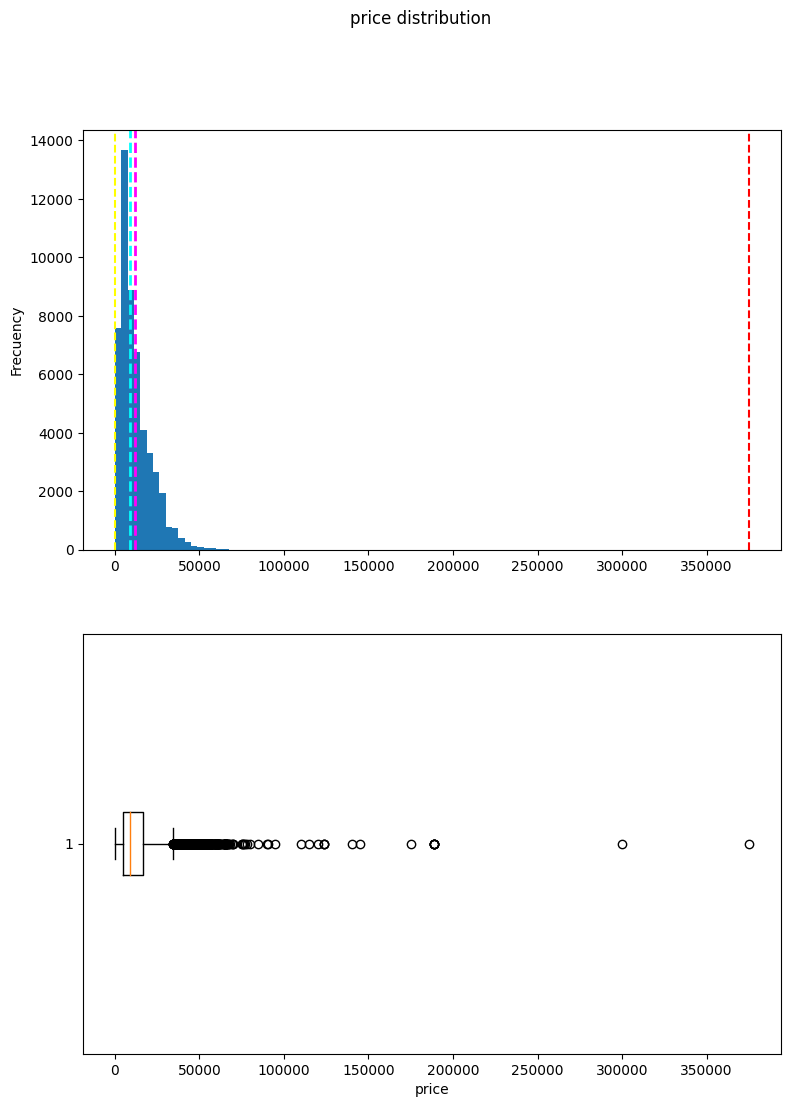

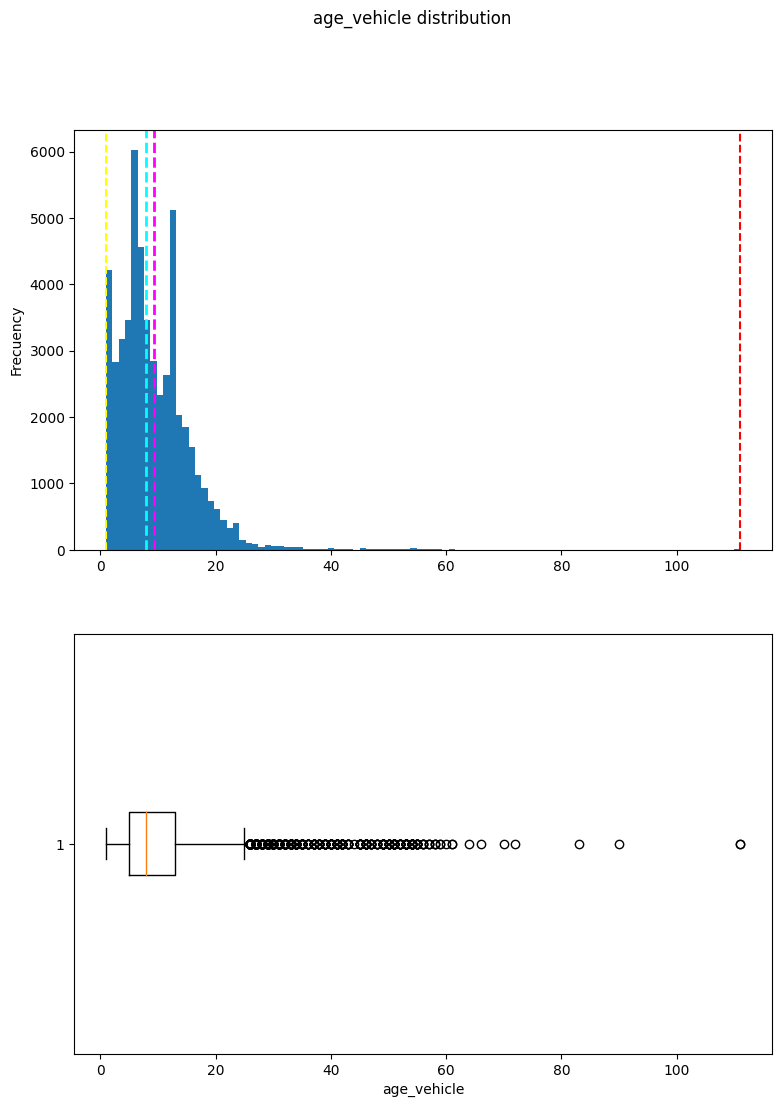

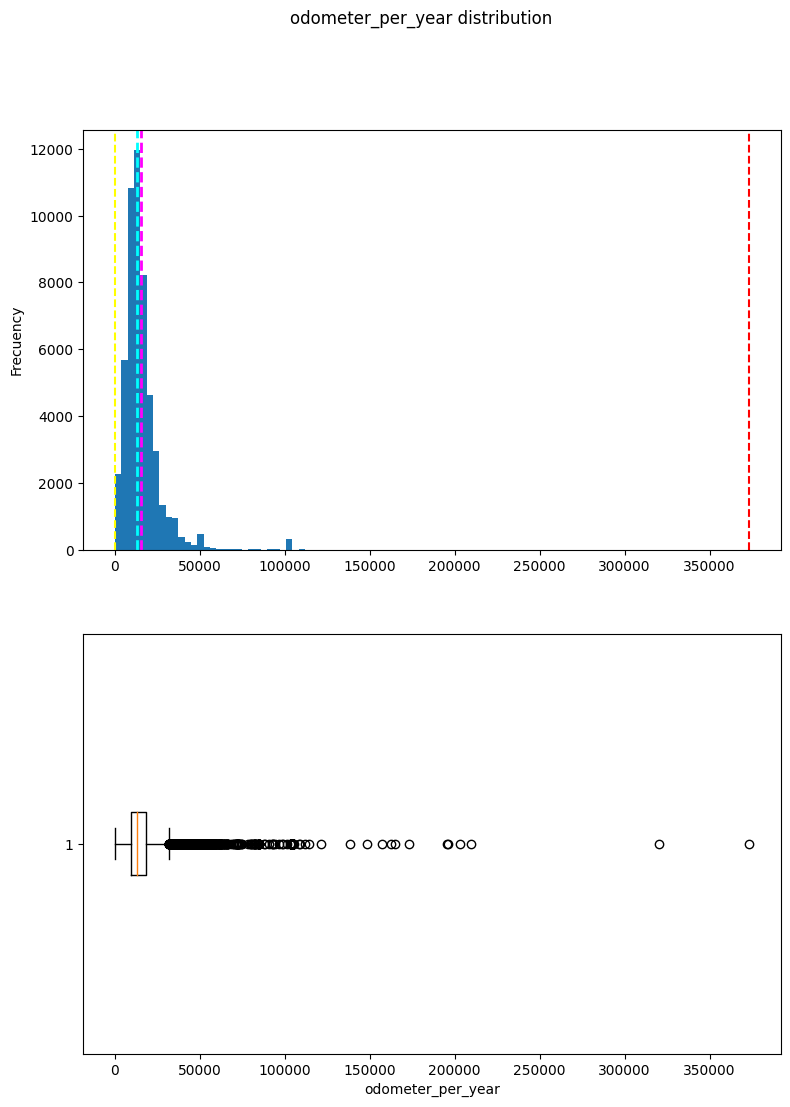

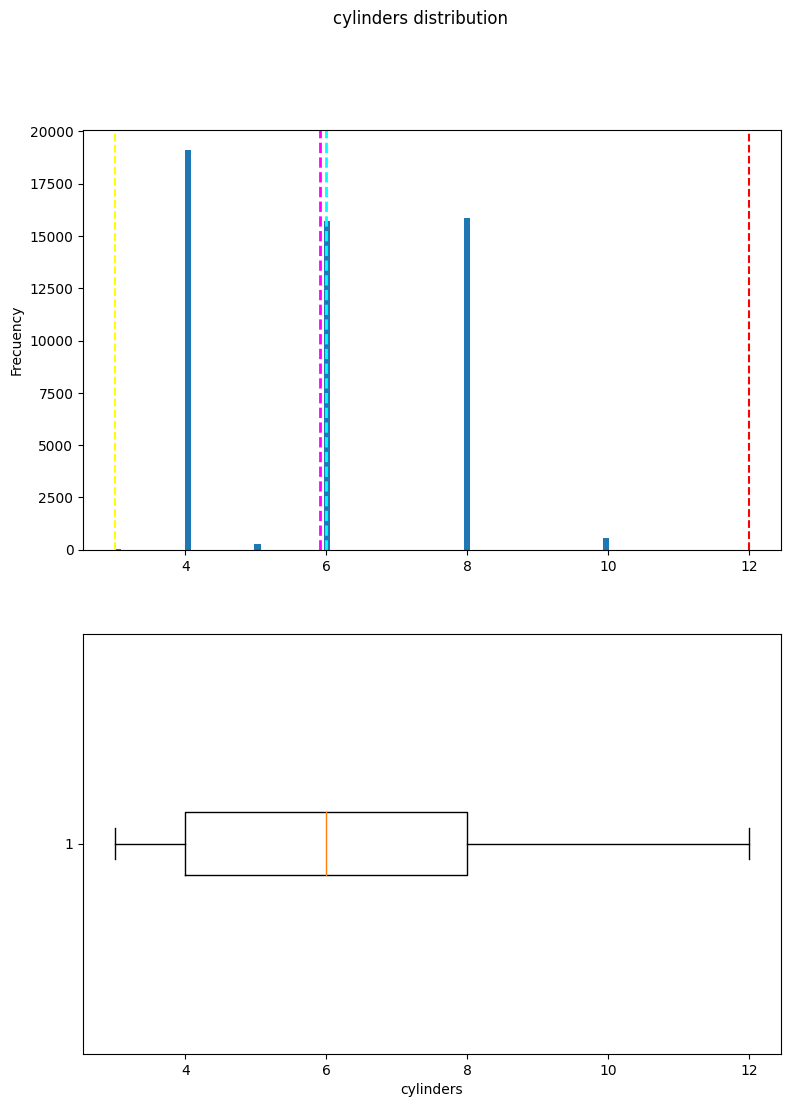

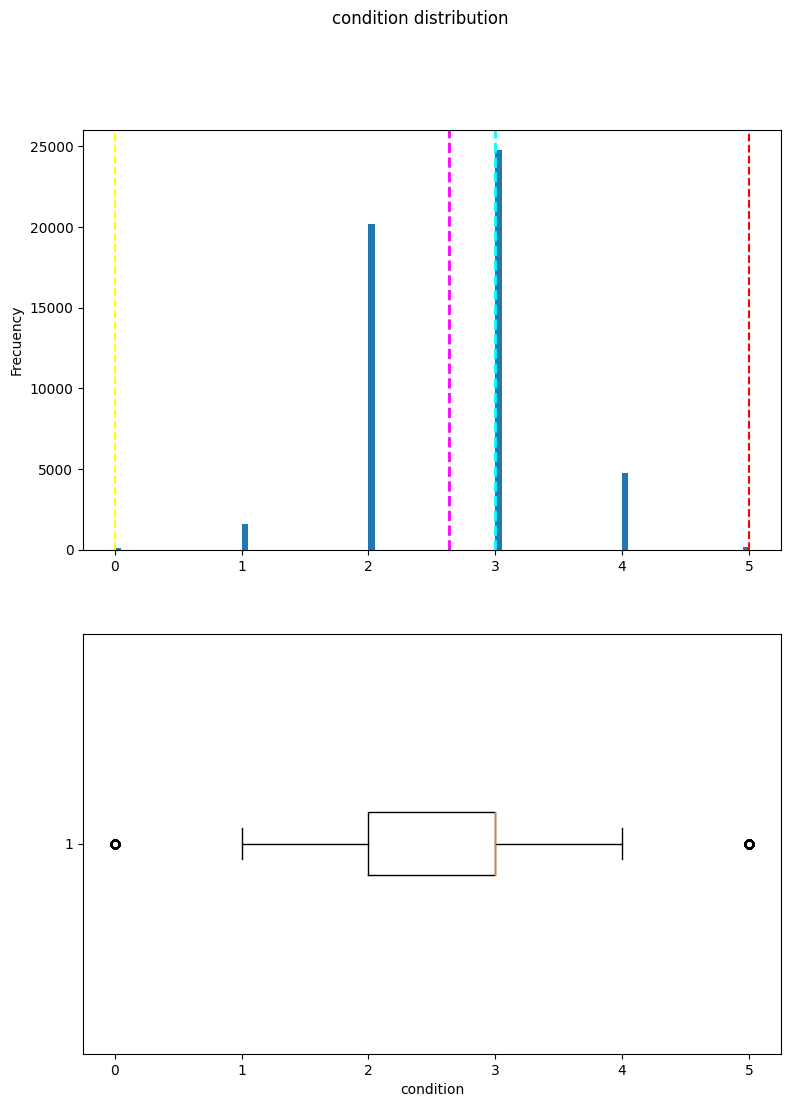

In [ ]:
column = ['price', 'age_vehicle', 'odometer_per_year', 'cylinders','condition']
for col in column:
    data = vehicles[col]
    fig, ax = plt.subplots(2,1, figsize=(9,12))
    #graficamos el histograma
    ax[0].hist(data, bins=100)
    ax[0].set_ylabel('Frecuency')
    ax[0].axvline(data.min(), color = 'yellow', linestyle='dashed')
    ax[0].axvline(data.max(), color='red', linestyle='dashed')
    ax[0].axvline(data.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(data.median(), color='cyan', linestyle='dashed', linewidth=2)
    #graficamos el diagrama de caja
    ax[1].boxplot(data, vert=False)
    ax[1].set_xlabel(col)
    fig.suptitle(col+' distribution')

Para graficar `transmission` y `paint_color` creamos una variable que contenga el conteo de estas columnas. Esto lo hacemos para poder hacer el gráfico de barras.  
>Nota: No se puede hacer un histograma con estas columnas porque no acepta variables categóricas

In [ ]:
#creamos la variable para transmission
count_vehicles_transmission = vehicles.transmission.value_counts()

#creamos la variable para paint_color
count_vehicles_paint_color = vehicles.paint_color.value_counts()

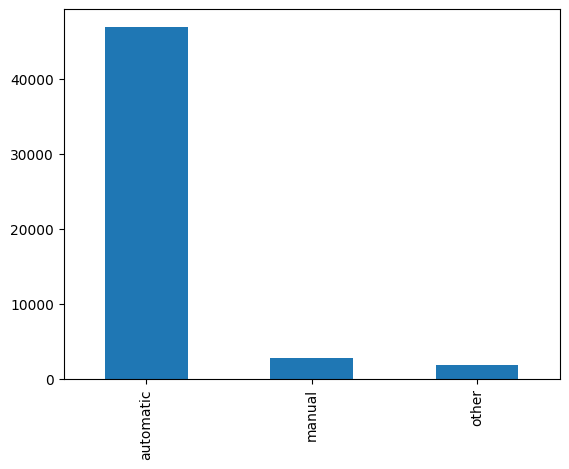

In [ ]:
#hacemos la gráfica de barras para transmission
count_vehicles_transmission.plot(kind='bar')
plt.show()

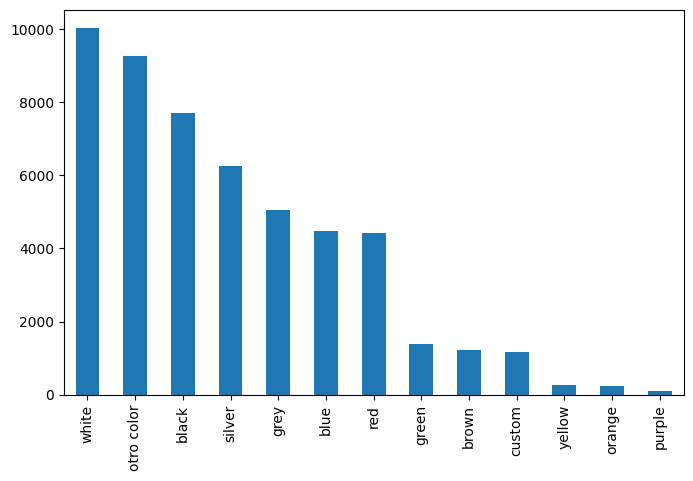

In [ ]:
#hacemos la gráfica de barras para paint_color
count_vehicles_paint_color.plot(kind='bar', figsize=(8,5))
plt.show()

De las 07 gráficas anteriores observamos:
 * ``Picos muy altos en el precio`` que llega a ***más de $350 000*** (línea roja) como máximo concentrando la mayor cantidad en los precios que son menores a $50000. Se observa también que ``hay valores atípicos`` fuera del límite superior del diagrama de bigotes.

 * ``Picos muy altos para la edad del vehículo`` que ***superan los 100 años*** (línea roja) concentrando la mayor cantidad de valores en las edades menores a 20 años. Se observa también que ``hay valores atípicos`` fuera del límite superior del diagrama de bigotes.

 * ``Picos muy altos en el millaje promedio`` recorrido por año cuyo máximo valor ***supera los 350000*** (línea roja). Los millajes recorridos se concentran más en valores menores a 50000. Se observa también que ``hay valores atípicos`` fuera del límite superior del diagrama de bigotes.

 * ``Respecto a los cilindros`` observamos que la mayor cantidad de vehículos que cuentan con cilindros de 4, 6 y 8. ``No hay valores atípicos.``
 * ``Respecto a la condición`` hay más vehículos en estado excelente y bueno, hay un poco menos de vehículos en estado como nuevo y regular. Hay muy pocos vehículos en estado *nuevo y salvage*. De acuerdo al gráfico de bigote, estos dos últimos representan ``valores atípicos.``

 * ``Respecto a la transmisión`` hay muchos más vehículos que funcionan en automático que en manual. Y hay otros pocos vehículos en que funcionan con otro tipo de transmisión. ``No hay valores atípicos.``
 
 * ``Respecto al color`` se observa que hay más autos de color blanco, **otro color**, negro, plata, gris, rojo y azul. También hay muchos autos que no se les especificó un color definido por lo que figuran como "otro color". ``No hay valores atípicos.``

Vamos a determinar los límites superior e inferior de los valores atípicos para las tres columnas `price`, `age_vehicle`, `odometer_per_year` y `condition` usando el rango intercuartil

In [ ]:
column = ['price', 'age_vehicle', 'odometer_per_year', 'condition']
for col in column:
    Q1 = vehicles[col].quantile(0.25)
    Q3 = vehicles[col].quantile(0.75)
    IQR = Q3 - Q1 #rango intercuartil
    print('El límite teórico inferior de la columna ',col, 'es: ',Q1-1.5*IQR)
    print('El límite teórico superior de la columna ',col, 'es: ',Q3+1.5*IQR)
    print('')

El límite teórico inferior de la columna  price es:  -12758.5
El límite teórico superior de la columna  price es:  34597.5

El límite teórico inferior de la columna  age_vehicle es:  -7.0
El límite teórico superior de la columna  age_vehicle es:  25.0

El límite teórico inferior de la columna  odometer_per_year es:  -4272.5
El límite teórico superior de la columna  odometer_per_year es:  32091.5

El límite teórico inferior de la columna  condition es:  0.5
El límite teórico superior de la columna  condition es:  4.5



Del cálculo de los límites inferior y superior concluimos lo siguiente:
* **Columna price:**
 - El límite inferior es -12758.5 y como ninguno de los valores del precio son menores a cero entonces el límite inferior que establecemos será de ``0``.
 - El límite superior es 34597.5. En este caso como se observa en los gráficos de bigotes de arriba que tenemos muchos valores por encima de 34597.5 llegando inclusive hasta más de 375000. Entonces estableceremos el límite superior en ``34597.5``.

* **Columna age_vehicle:**
 - El límite inferior -7 y como ninguno de los valores de la edad del vehículo son menores a cero entonces el límite inferior que establecemos será de ``0``.
 - El límite superior es 25. En este caso como se observa en los gráficos de bigotes de arriba tenemos muchos valores por encima de 24 llegando inclusive hasta más de 100 años. Entonces estableceremos el límite superior en ``25``.

 * **Columna odometer_per_year:**
 - El límite inferior -4272.5 y como ninguno de los valores del millaje promedio recorrido por vehículo son menores a cero entonces el límite inferior que establecemos será de ``0``.
 - El límite superior es 32091.5. En este caso como se observa en los gráficos de bigotes de arriba tenemos muchos valores por encima de 33000 llegando inclusive hasta más de 375000. Entonces estableceremos el límite superior en ``32091.5``.

  * **Columna condition:**
 - El límite inferior es 0.5 y observamos que la condición 0 que representa a `salvage` está fuera del límite inferior.
 - El límite superior es 4.5 y observamos que la condición 5 que representa a `new` está fuera del límite superior.

Para visualizar mejor la distribución de los datos acortaremos el rango en el eje x solo para las columnas que presentan valores atípicos teniendo en cuenta los límites superiores e inferiores definidos.

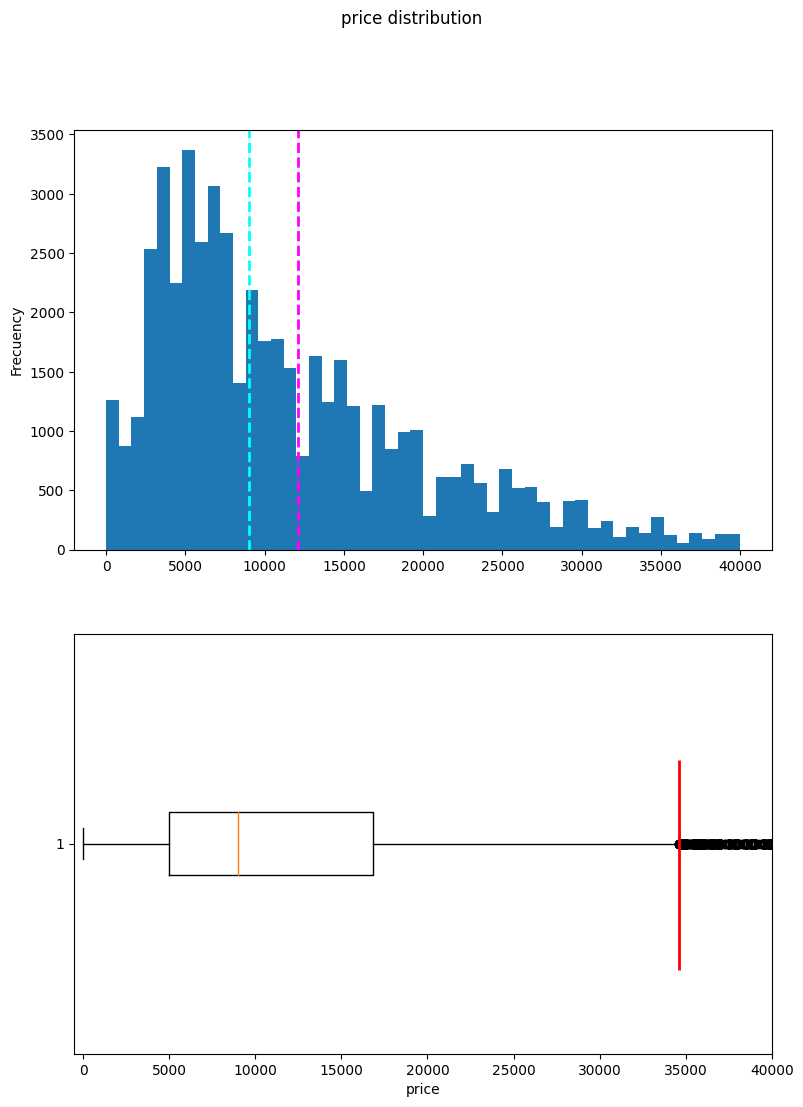

In [ ]:
#COLUMNA PRICE 

fig, ax = plt.subplots(2,1, figsize=(9,12))
#graficamos el histograma
ax[0].hist(vehicles['price'], bins=50, range=(0,40000)) 
ax[0].set_ylabel('Frecuency')
ax[0].axvline(vehicles.price.mean(), color='magenta', linestyle='dashed', linewidth=2) #media
ax[0].axvline(vehicles.price.median(), color='cyan', linestyle='dashed', linewidth=2) #mediana
#graficamos el diagrama de caja
ax[1].boxplot(vehicles['price'], vert=False)
ax[1].set_xlim(xmin=-500, xmax=40000)  
ax[1].vlines(x=34597.5, ymin=0.7, ymax=1.2, color='red', linewidth=2) #límite superior 34597.5
ax[1].set_xlabel('price')
fig.suptitle('price distribution')
plt.show()

Text(0.5, 0.98, 'age_vehicle distribution')

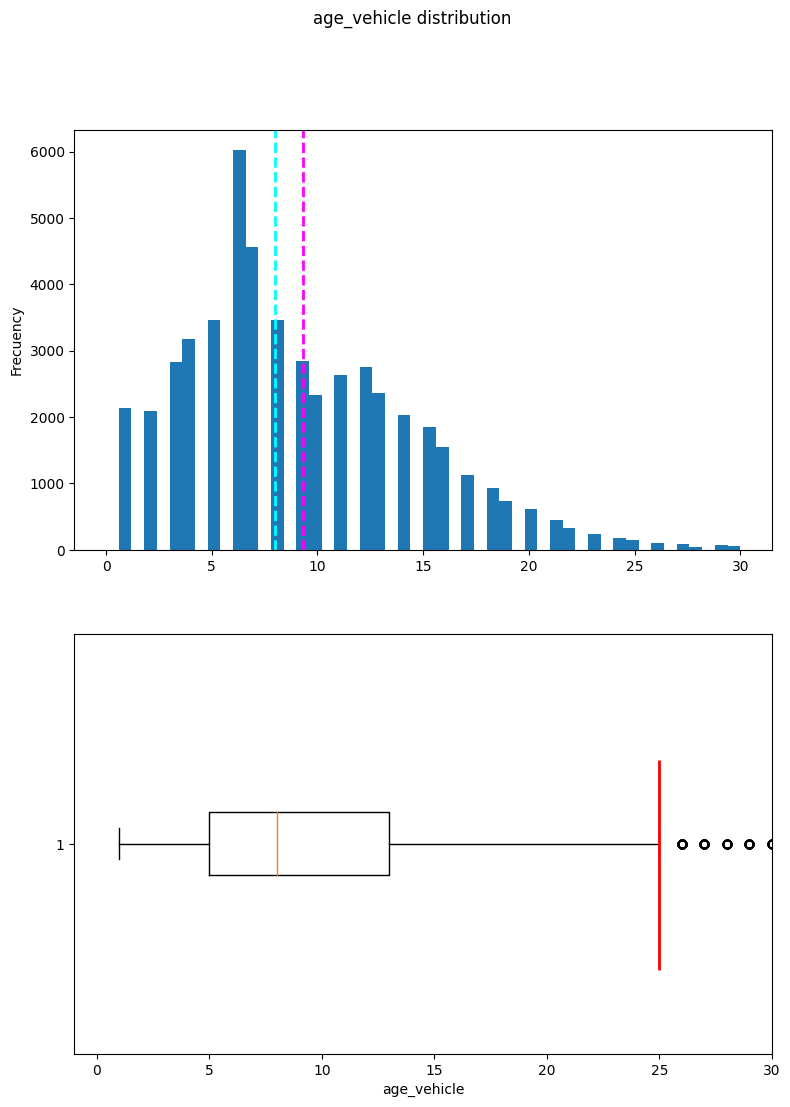

In [ ]:
#COLUMNA AGE_VEHICLE

fig, ax = plt.subplots(2,1, figsize=(9,12))
#graficamos el histograma
ax[0].hist(vehicles['age_vehicle'], bins=50, range=(0,30)) 
ax[0].set_ylabel('Frecuency')
ax[0].axvline(vehicles.age_vehicle.mean(), color='magenta', linestyle='dashed', linewidth=2) #media
ax[0].axvline(vehicles.age_vehicle.median(), color='cyan', linestyle='dashed', linewidth=2) #mediana
#graficamos el diagrama de caja
ax[1].boxplot(vehicles['age_vehicle'], vert=False)
ax[1].set_xlim(xmin=-1, xmax=30)  
ax[1].vlines(x=25, ymin=0.7, ymax=1.2, color='red', linewidth=2) #límite superior 25
ax[1].set_xlabel('age_vehicle')
fig.suptitle('age_vehicle distribution')

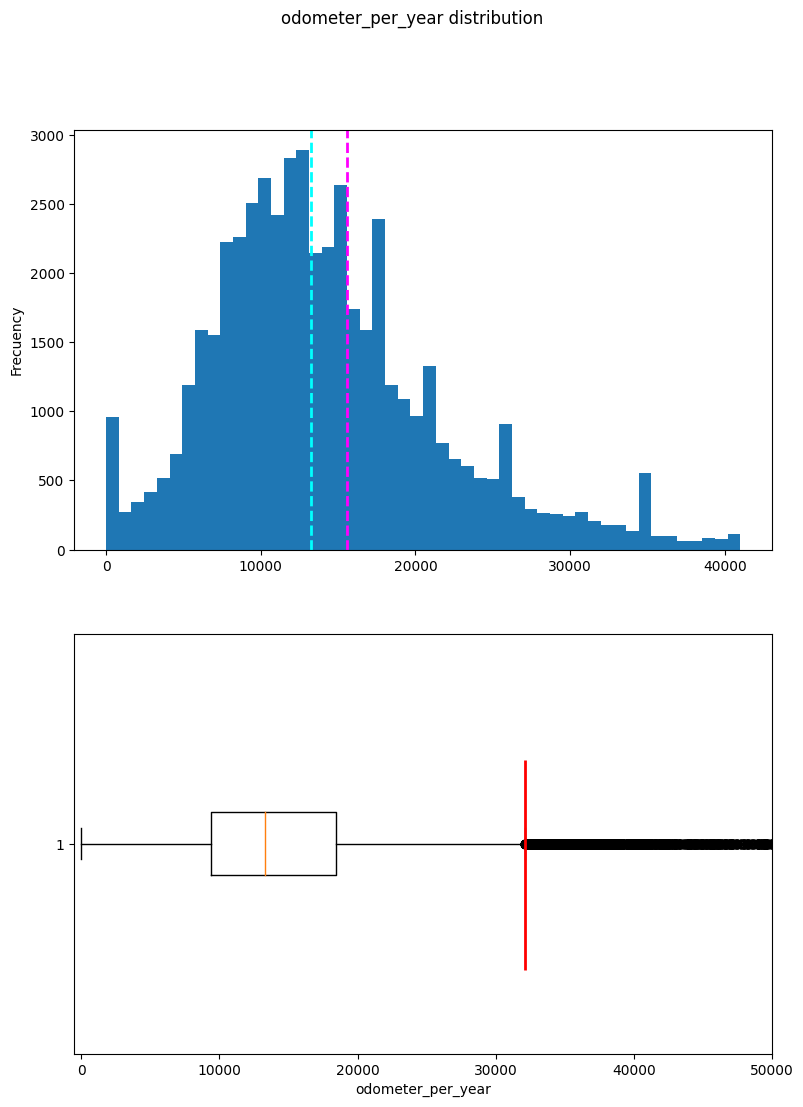

In [ ]:
#COLUMNA ODOMETER_PER_YEAR

fig, ax = plt.subplots(2,1, figsize=(9,12))
#graficamos el histograma
ax[0].hist(vehicles['odometer_per_year'], bins=50, range=(0,41000)) 
ax[0].set_ylabel('Frecuency')
ax[0].axvline(vehicles.odometer_per_year.mean(), color='magenta', linestyle='dashed', linewidth=2) #media
ax[0].axvline(vehicles.odometer_per_year.median(), color='cyan', linestyle='dashed', linewidth=2) #mediana
#graficamos el diagrama de caja
ax[1].boxplot(vehicles['odometer_per_year'], vert=False)
ax[1].set_xlim(xmin=-500, xmax=50000)  
ax[1].vlines(x=32091.5, ymin=0.7, ymax=1.2, color='red', linewidth=2) #límite superior 32091.5
ax[1].set_xlabel('odometer_per_year')
fig.suptitle('odometer_per_year distribution')
plt.show()

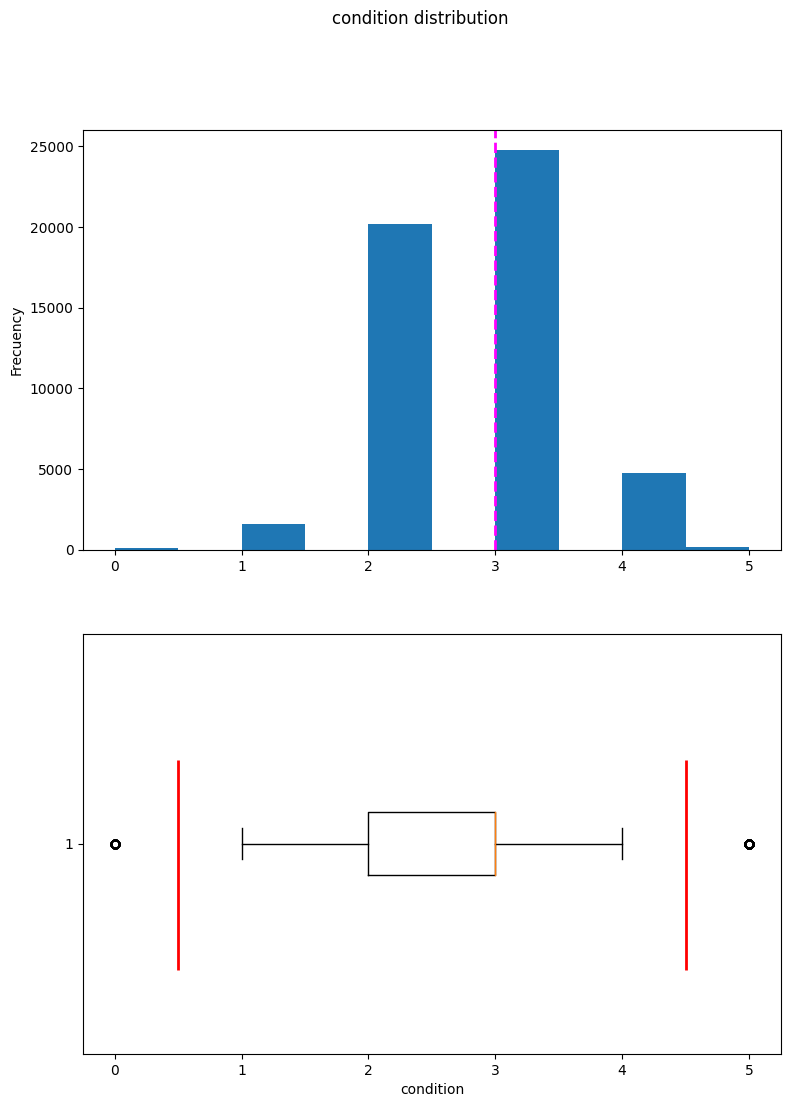

In [ ]:
#COLUMNA CONDITION

fig, ax = plt.subplots(2,1, figsize=(9,12))
#graficamos el histograma
ax[0].hist(vehicles['condition']) 
ax[0].set_ylabel('Frecuency')
ax[0].axvline(vehicles.condition.mode()[0], color='magenta', linestyle='dashed', linewidth=2) #moda
#graficamos el diagrama de caja
ax[1].boxplot(vehicles['condition'], vert=False)
#ax[1].set_xlim(xmin=-500, xmax=50000)  
ax[1].vlines(x=4.5, ymin=0.7, ymax=1.2, color='red', linewidth=2) #límite superior 4.5
ax[1].vlines(x=0.5, ymin=0.7, ymax=1.2, color='red', linewidth=2) #límite inferior 0.5
ax[1].set_xlabel('condition')
fig.suptitle('condition distribution')
plt.show()

De acuerdo a los cuatro gráficos de arriba (`price`, `age_vehicle`, `odometer_per_year` y `condition`), si filtramos los datos por donde señala la línea roja en el diagrama de cajas entonces nos estaremos deshaciendo de los valores atípicos.

De acuerdo a ello, segmentaremos nuestros datos de la siguiente manera:
- `price` <= 34597.5
- `age_vehicle` <= 25
- `odometer_per_year` <= 32091.5
-  0.5 <= `condition` <= 4.5

Para realizar el filtrado haremos un bucle for que nos filtre los datos que cumplen con las condiciones.

In [ ]:
column = ['price', 'age_vehicle', 'odometer_per_year', 'condition']
filter_vehicles = vehicles.copy()

for col in column:
    Q1 = filter_vehicles[col].quantile(0.25)
    Q3 = filter_vehicles[col].quantile(0.75)
    IQR = Q3 - Q1 #rango intercuartil
    lim_inf = Q1-1.5*IQR
    lim_sup = Q3+1.5*IQR
    filter_vehicles = filter_vehicles[(filter_vehicles[col] >= lim_inf) & (filter_vehicles[col] <= lim_sup)]

filter_vehicles.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_vehicle,odometer_per_year
51519,11750,2015,honda accord,3,4,gas,104230.0,automatic,coupe,otro color,0,2018-11-24,89,5,11,2018,4,26058.0
51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,10,2018,6,14689.0
51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,10,12800.0
51523,7455,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,7,2018,6,23262.0
51524,6300,2014,nissan altima,2,4,gas,104230.0,automatic,sedan,otro color,0,2018-06-05,10,1,6,2018,5,20846.0


In [ ]:
#mostramos el porcentaje de pérdida de datos
100*(1 - len(filter_vehicles)/len(vehicles))

10.804463852498792

In [ ]:
# OTRA FORMA DE HACERLO HUBIESE SIDO USANDO QUERY()
#guardamos nuestros datos segmentados en una nueva variable
#filter_vehicles = vehicles.query('price <= 34597.5 and age_vehicle <= 25 and odometer_per_year <= 32091.5 and 0.5 <= condition <= 4.5')

Observamos que los datos que se filtraron de la tabla original representan solamente el 11% del total.

Ahora compararemos nuestro dataframe de datos filtrados con el dataframe original. Haremos la comparación a través de histogramas.

Crearemos una función para ahorrar líneas de código:

In [ ]:
def plot_hist(df1, df2, column, bins_1, bins_2):
    fig, ax = plt.subplots(1,2, figsize=(16,10))
    #graficamos el histograma de los datos sin filtrar
    ax[0].hist(df1[column], bins=bins_1) 
    ax[0].set_ylabel('Frecuency')
    ax[0].axvline(df1[column].mean(), color='magenta', linestyle='dashed', linewidth=2) #media
    ax[0].axvline(df1[column].median(), color='cyan', linestyle='dashed', linewidth=2) #mediana
    #graficamos el histograma de los datos filtrados
    ax[1].hist(df2[column], bins=bins_2)
    ax[1].axvline(df2[column].mean(), color='magenta', linestyle='dashed', linewidth=2) #media
    ax[1].axvline(df2[column].median(), color='cyan', linestyle='dashed', linewidth=2) #mediana
    fig.suptitle(column + ' distribution')
    return plt.show()

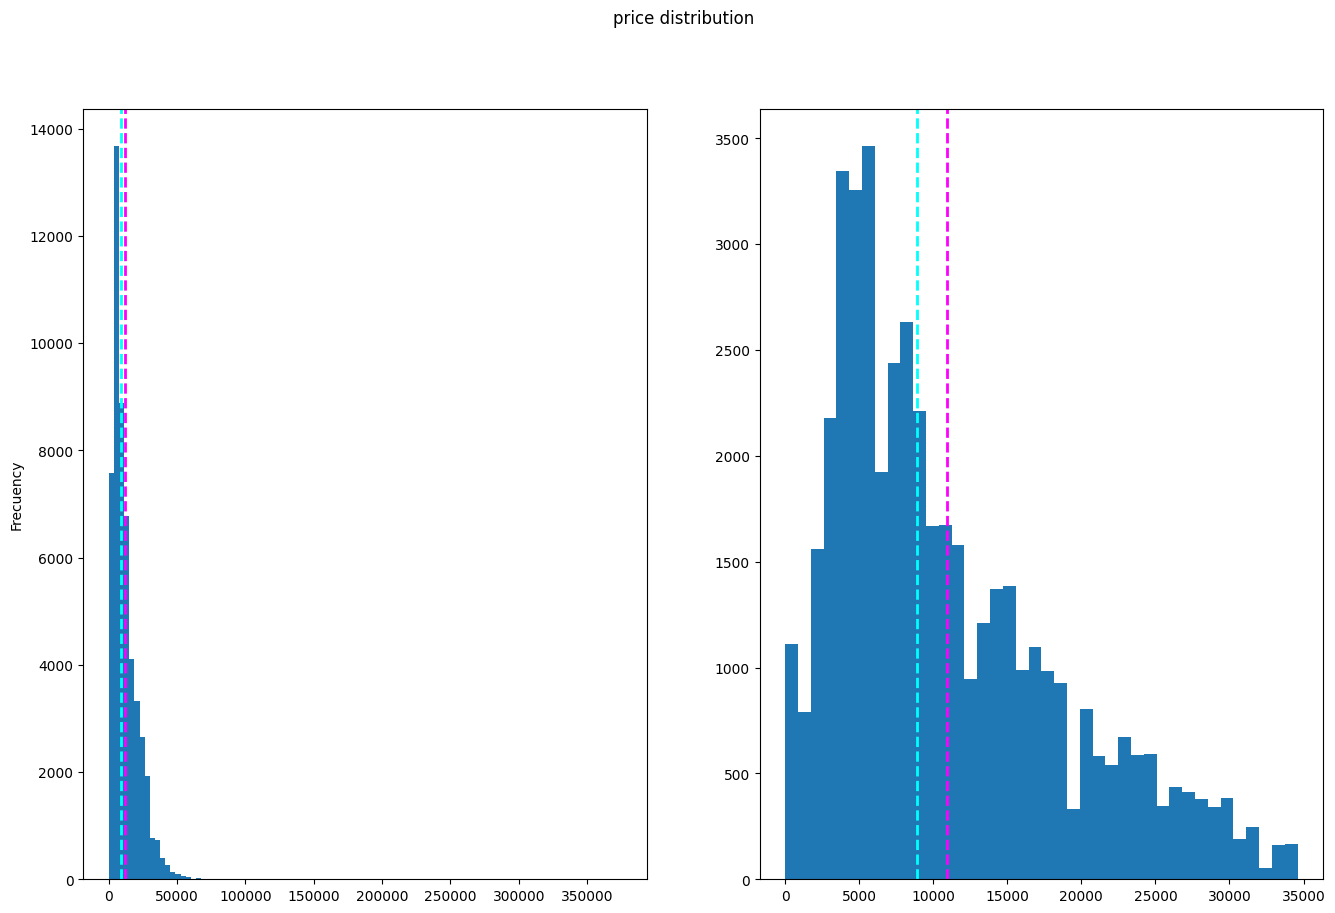

In [ ]:
plot_hist(vehicles, filter_vehicles, 'price', 100, 40)

Se observa una clara diferencia en la distribución de los precios entre los datos sin filtrar (izquierda) y los datos filtrados (derecha). 
- En los datos sin filtrar tenemos un enorme sesgo a la izquierda cuyos valores se concentran por debajo de los $50000 y más allá de este valor ya no es posible ver la frecuencia de los otros precios.
- Respecto a los datos filtrados se observa una mejor distribución en los datos, presentando mayor concentración en torno a los $5000 y $10000 principalmente. Se observa también que entre la mediana (línea color cyan) y la media (línea color magenta) no hay una brecha muy alta. La media está más a la derecha en vista que los precios más altos tiran de ella hacia ese lado.

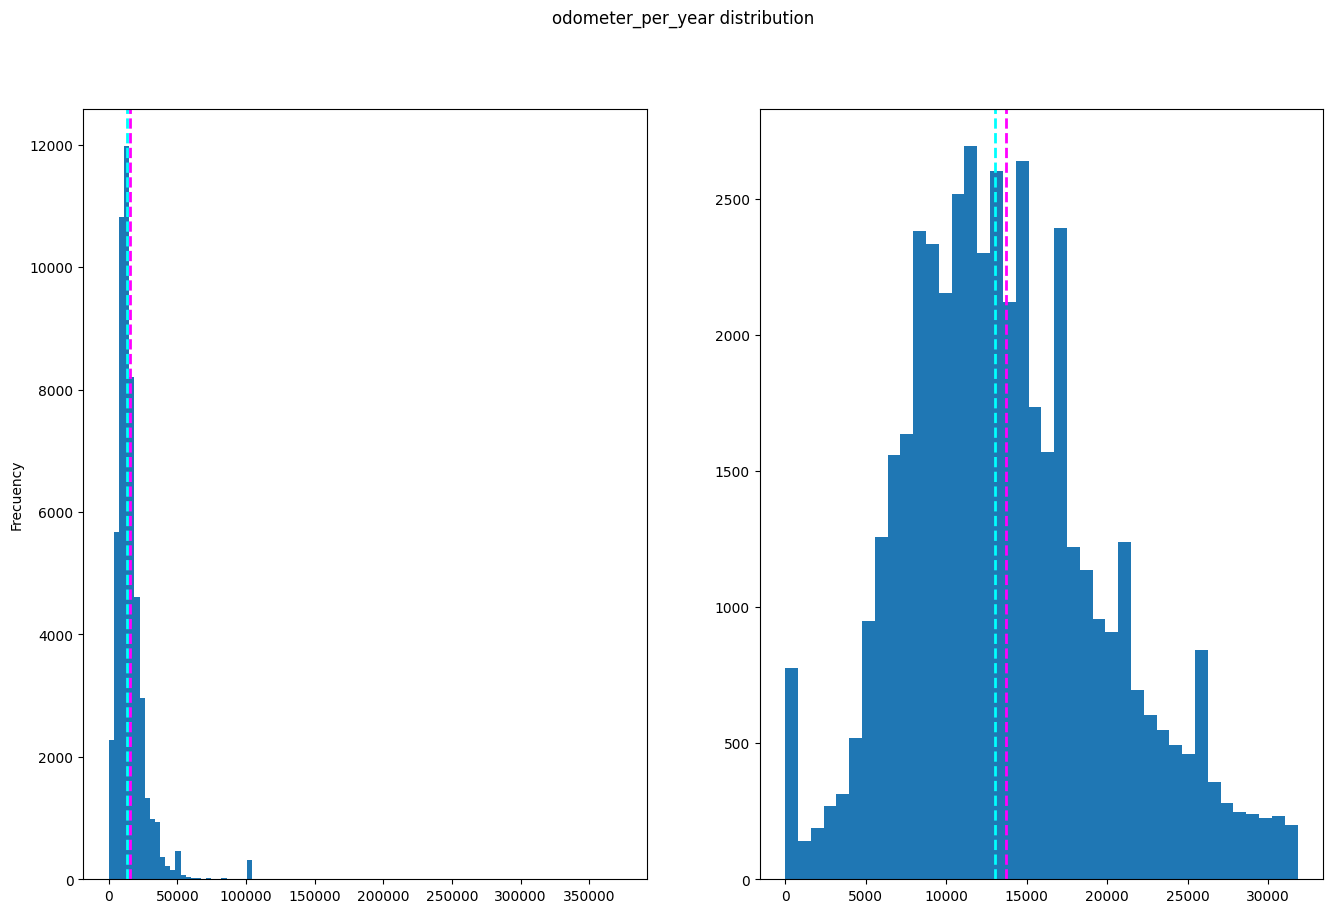

In [ ]:
plot_hist(vehicles, filter_vehicles, 'odometer_per_year', 100, 40)

Se observa una clara diferencia en la distribución de millaje promedio por año entre los datos sin filtrar (izquierda) y los datos filtrados (derecha). 
- En los datos sin filtrar tenemos un enorme sesgo a la izquierda cuyos valores se concentran por debajo de los 50000 esencialmente y más allá de este valor se observan frecuencia más bajas desapareciendo cuando el millaje es superior a los 120000.
- Respecto a los datos filtrados se observa una mejor distribución en los datos, presentando mayor concentración en torno a los 5000 y 25000 principalmente. Casi se asemeja a una distribución normal. Se observa también que entre la mediana (línea color cyan) y la media (línea color magenta) la brecha es casi mínima. La media está más a la derecha en vista que las millas más altas tiran de ella hacia ese lado.

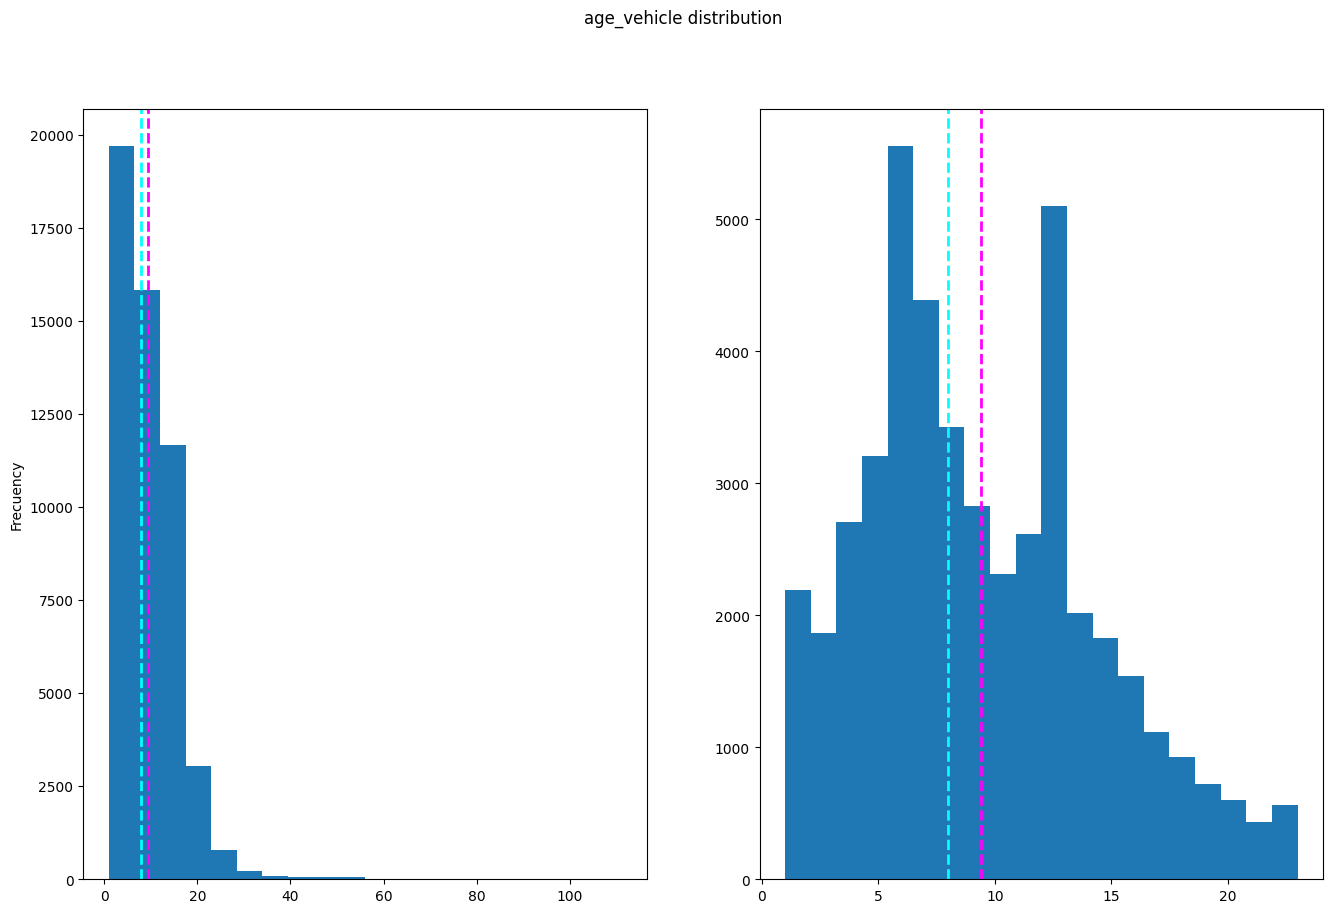

In [ ]:
plot_hist(vehicles, filter_vehicles, 'age_vehicle', 20, 20)

Se observa una clara diferencia en la distribución de la antiguedad del vehículo entre los datos sin filtrar (izquierda) y los datos filtrados (derecha). 
- En los datos sin filtrar tenemos un enorme sesgo a la izquierda cuyos valores se concentran por debajo de los 25 principalmente y más allá de este valor se observan frecuencia más bajas desapareciendo cuando la antiguedad es superior a los 40 años.
- Respecto a los datos filtrados se observa una mejor distribución en los datos, presentando mayor concentración en torno a los 2 y 20 años principalmente. Se aprecian dos picos en torno a los 6 años y 12 años de antiguedad. Se observa también que entre la mediana (línea color cyan) y la media (línea color magenta) la brecha es casi mínima. La media está más a la derecha en vista que las edades (antiguedad) más altas tiran de ella hacia ese lado.

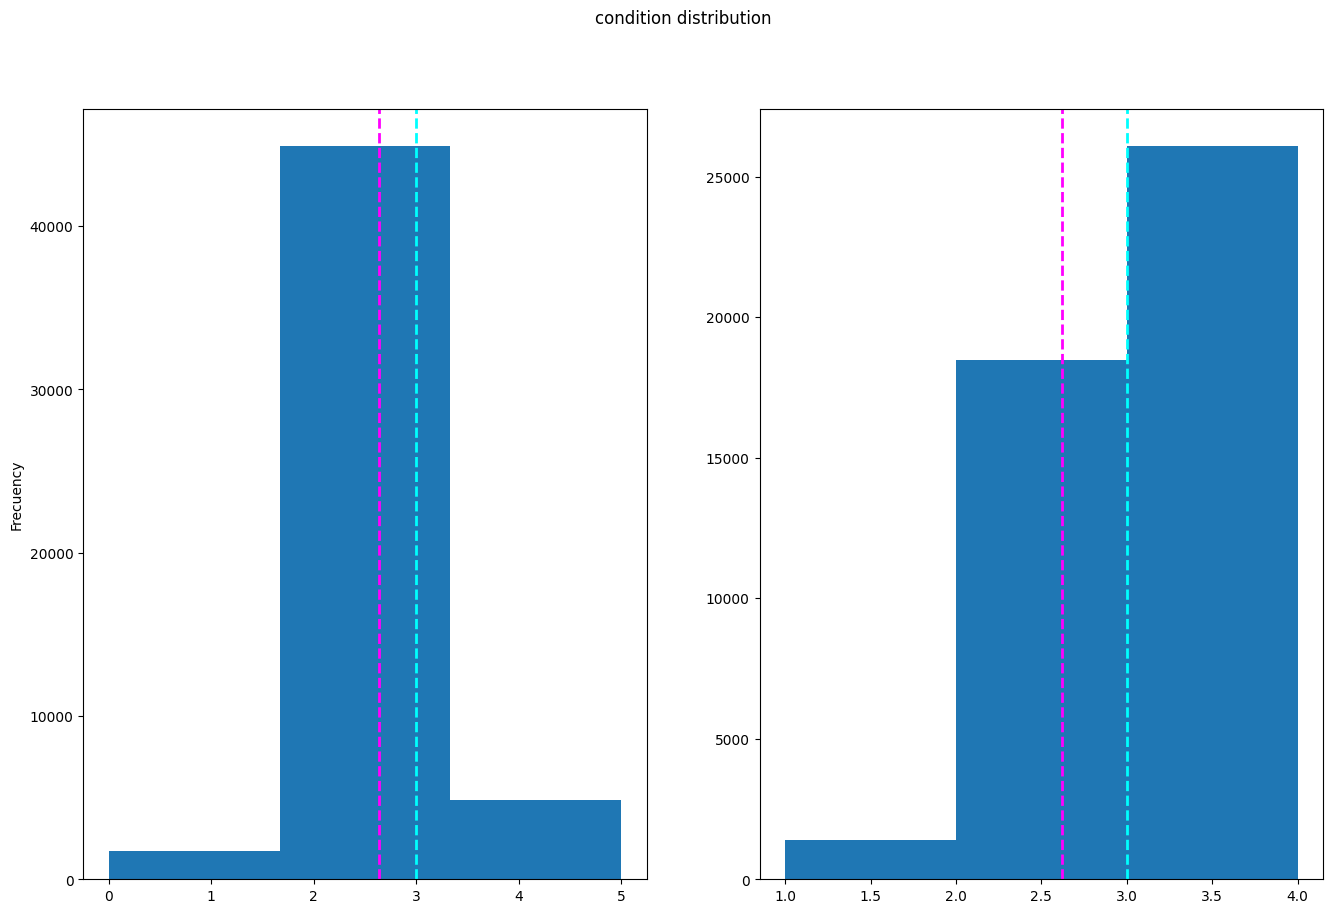

In [ ]:
plot_hist(vehicles, filter_vehicles, 'condition', 3, 3)

Se observa en el gráfico filtrado (derecha) que los vehículos como nuevos y excelentes (4 y 3) abundan más, seguidos por los vehículos buenos (2) y regular (1). La moda es 3 así que los carros excelentes son los que más se anuncian.

La distribución de nuestros parámetros principales `price`, `age_vehicle`, `odometer_per_year`, `cylinders`, `condition`, `transmission` y `paint_color` sin valores atípicos se ven mucho mejor que cuando existían los valores atípicos, principalmente para `price`, `age_vehicle`, `odometer_per_year` y `condition` ya que `cylinders`, `transmission` y `paint_color` no presentaban valores atípicos.

Ahora determinaremos el **PERIODO DE COLOCACION DE LOS ANUNCIOS**

In [ ]:
#mostramos los datos que tenemos
filter_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_vehicle,odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,otro color,1,2018-06-23,19,5,6,2018,8,18125.0
1,25500,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,6,14784.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,7,15714.0
3,1500,2003,ford f-150,1,8,gas,104230.0,automatic,pickup,otro color,0,2019-03-22,9,4,3,2019,17,6131.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,3,26968.0


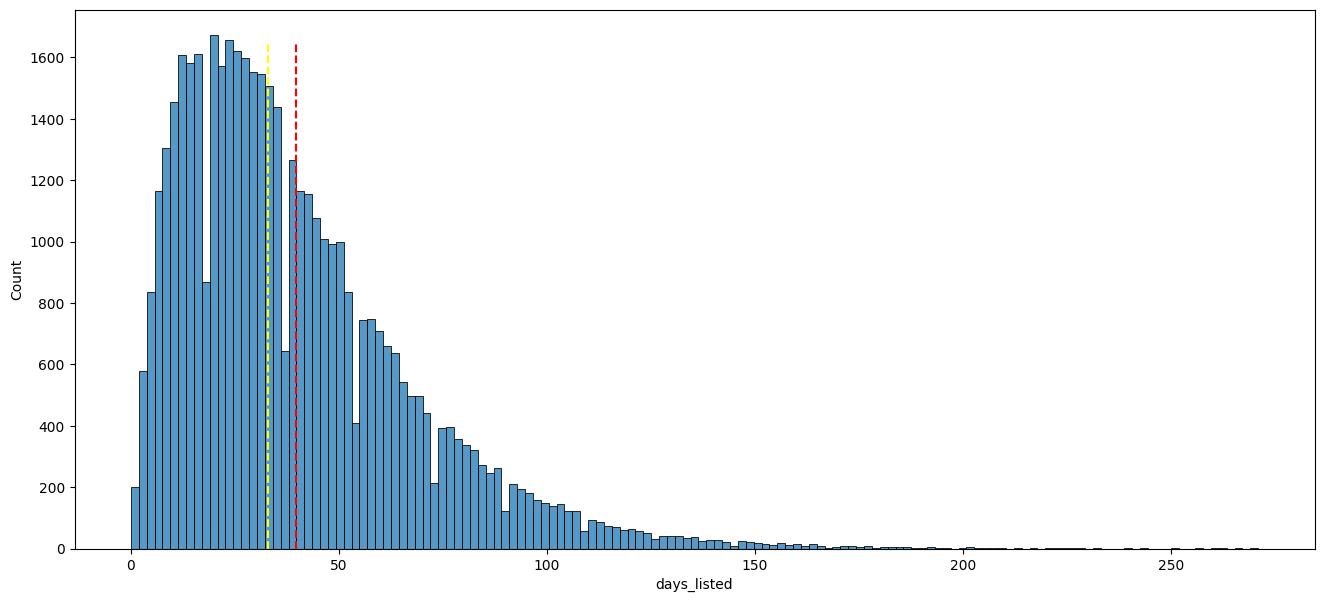

La media es:  39.588559119195786

La mediana es:  33.0

El número mínimo de días de publicado el anuncio es:  0

El número máximo de días de publicado el anuncio es:  271


In [ ]:
#hacemos un histograma
fig = plt.figure(figsize=(16,7))
sns.histplot(x='days_listed', data=filter_vehicles)
plt.vlines(filter_vehicles.days_listed.mean(), colors='red', linestyles='dashed', ymin=0, ymax=1650) #media
plt.vlines(filter_vehicles.days_listed.median(), colors='yellow', linestyles='dashed', ymin=0, ymax=1650) #mediana
plt.show()
print('La media es: ', filter_vehicles.days_listed.mean())
print('')
print('La mediana es: ', filter_vehicles.days_listed.median())
print('')
print('El número mínimo de días de publicado el anuncio es: ', filter_vehicles.days_listed.min())
print('')
print('El número máximo de días de publicado el anuncio es: ', filter_vehicles.days_listed.max())

In [ ]:
#mostramos cuantas publicaciones han sido publicadas en menos de 24 horas y más de 09 meses (271 dias)
print(filter_vehicles[filter_vehicles['days_listed']==0]['days_listed'].value_counts())
print('')
print(filter_vehicles[filter_vehicles['days_listed']==271]['days_listed'].value_counts())

0    47
Name: days_listed, dtype: int64

271    1
Name: days_listed, dtype: int64


Observamos en el histograma y sacamos las siguientes conclusiones:
* Los días que demoró un anunción en publicación van hasta los ``271 días como máximo``, es decir aproximadamente 09 meses (solamente hay una publicación de este tipo). Sin embargo la cantidad de este tipo de anuncios con una duración extremadamente larga es muy baja.
* Se aprecia en el gráfico que han habido publicaciones que han durado ``'0' dias`` (aproximadamente 47 publicaciones de este tipo), esto no tiene mucho sentido si lo entendemos como días. Sin embargo es posible que estas publicaciones hayan permanecido solo por horas y luego se retiraron.
* La media (39.5 dias, línea roja en el gráfico) y la mediana (``33 dias``, línea amarilla en el gráfico) no distan mucho entre si por lo que se podría tomar cualquiera como valor referencial promedio del número de días que se mantiene una publicación, sin embargo la mediana es un mejor valor del ``tiempo de colocación habitual`` en vista de que hay valores de tiempo muy grandes (hasta 271 dias) que distorsionan la media.
* se observa también que la mayor concentración de días ocurre en el rango de 0 a 100 días.

Calcularemos el precio promedio por cada tipo de vehículo 

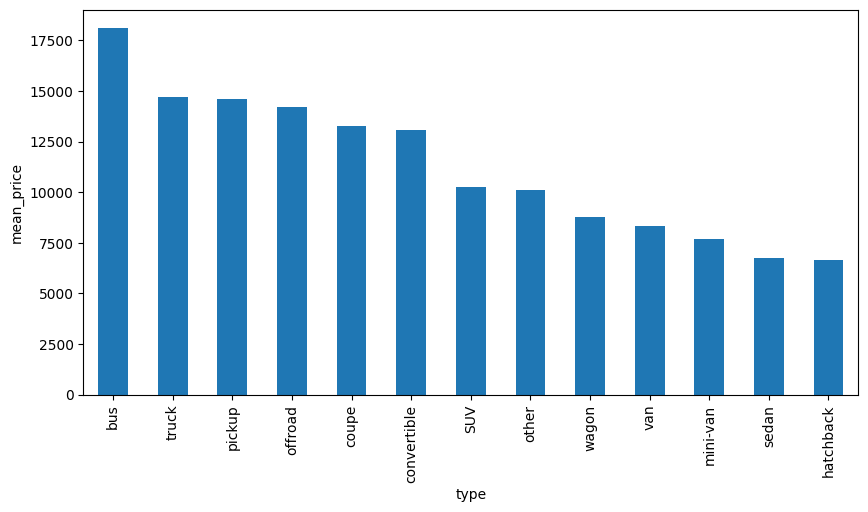

In [ ]:
filter_vehicles.groupby('type')['price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.ylabel('mean_price')
plt.show()

Observamos que los vehículos con mayor precio son los vehículos de carga pesada como el `bus` y `truck` seguido por un `pickup` que mantiene un precio parecido al `truck`. Los vehículos con precios más bajos son la `minivan`, `sedan` y `hatchback`.

Mostramos el número de anuncios por cada tipo de vehículo.

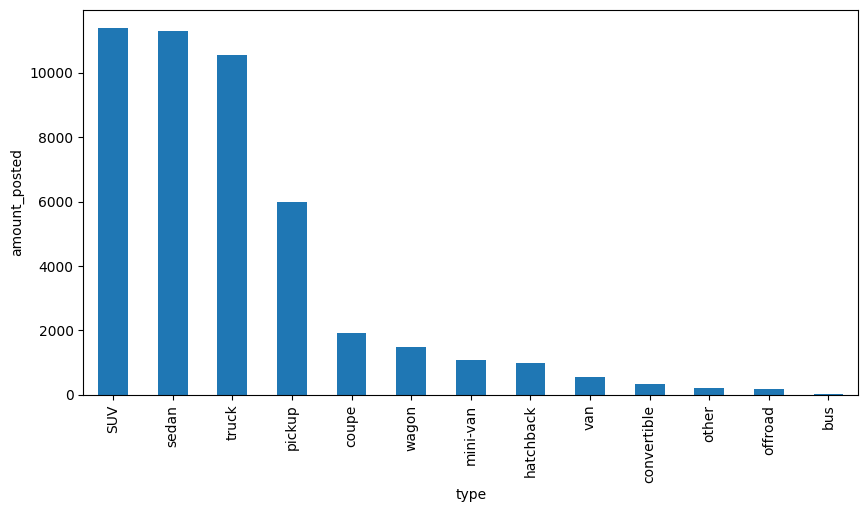

In [ ]:
filter_vehicles.groupby('type')['days_listed'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.ylabel('amount_posted')
plt.show()

Se observa en la gráfica que los tipos de vehículos `SUV`, `sedan` y `truck` presentan la mayor cantidad de anuncios. Mientras que `bus` presenta la menor cantidad de anuncios seguido de `offroad`.

En resumen `SUV` y `sedan` tienen la mayor cantidad de anuncios y el precio promedio de cada vehículo es de ``$10000 y $7500`` aproximadamente. Mientras que `Bus` y `truck` presentan la menor cantidad de anuncios y el precio promedio de cada vehículo es de ``$17500 y $15000`` aproximadamente.

Vamos a seleccionar los 2 tipos más populares de vehículos, que de acuerdo al gráfico anterior son `SUV`, `sedan` para determinar si el precio depende de:
* edad (age_vehicle)
* millaje (odometer_per_year)
* condición (condition)
* transmisión (transmission)
* color (type_color)

In [ ]:
#filtramos la tabla solo por los 02 tipos de vehículos
type = ['SUV', 'sedan']

filtered_vehicles_type = filter_vehicles[filter_vehicles['type'].isin(type)]

In [ ]:
filtered_vehicles_type.type.value_counts()

SUV      11387
sedan    11310
Name: type, dtype: int64

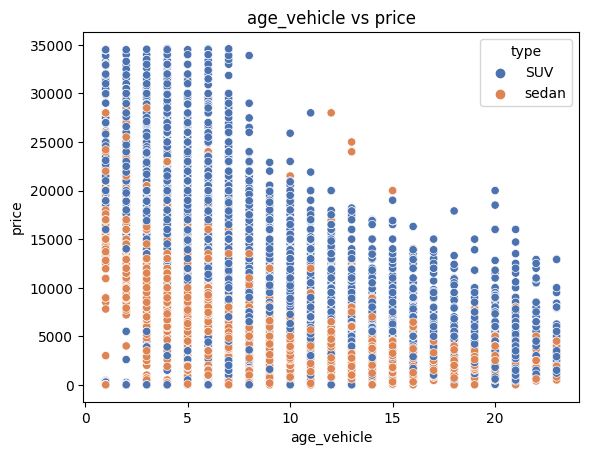

In [ ]:
# EDAD VS PRECIO PARA LOS TIPOS DE VEHICULOS SUV Y SEDAN

sns.scatterplot(x='age_vehicle', y='price', data=filtered_vehicles_type, hue='type', palette='deep')
plt.title('age_vehicle vs price')
plt.ylabel('price')
plt.xlabel('age_vehicle')
plt.show()

Observamos que no hay una relación lineal fuerte entre el precio y la edad del vehículo pero se puede apreciar que la relación es negativa. Se puede notar que el precio es mayor para cada tipo de vehículo cuando la edad del vehículo disminuye. Para el tipo de vehículo `SUV` el precio llega hasta los $35000 cuando la edad es menor a 6 años y para el `sedan` el precio alcanza los $15000 cuando la edad es menor a 5 años. Se observa que los vehículos SUV cuestan más que los sedan y hay más de estos tipos que son vendidos.

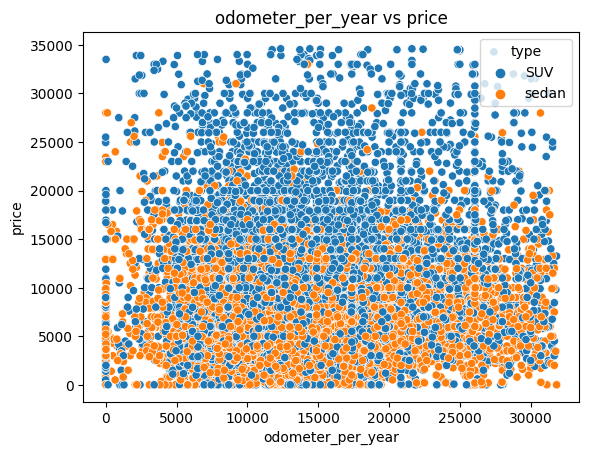

In [ ]:
# MILLAJE VS PRECIO

sns.scatterplot(x='odometer_per_year', y='price', hue='type', data=filtered_vehicles_type)
plt.title('odometer_per_year vs price')
plt.ylabel('price')
plt.xlabel('odometer_per_year')
plt.show()

Se observa que no existe una correlación lineal entre el millaje promedio recorrido al año y el precio para ambos tipos de vehículo. Se puede notar también en el gráfico que hay más compra de vehículos `SUV` para un millaje entre 5000 y 30000 y un precio menor a $20000. Respecto al vehículo `sedan` hay más compras cuando el precio es menor a $15000 para un millaje entre 5000 y 30000.

Las variables categóricas `transmission`, `color` y `condition` no se pueden graficar en un gráfico de dispersión. Representaremos estas variables en un gráfico de bigotes y para ello tendremos en cuenta que las categorías tengan al menos ``50 anuncios``.

Sabemos que cada fila en nuestro dataframe ``filtered_vehicles_type`` es un anuncio, por lo tanto comprobamos con un conteo que nuestras categorías tengan al menos 50 anuncios.

In [ ]:
# hacemos la comprobación
print('CONDICION')
print(filtered_vehicles_type.condition.value_counts(),'\n')
print('TRANSMISION')
print(filtered_vehicles_type.transmission.value_counts(),'\n')
print('COLOR')
print(filtered_vehicles_type.paint_color.value_counts(),'\n')

CONDICION
3    11770
2     8184
4     2179
1      564
Name: condition, dtype: int64 

TRANSMISION
automatic    21426
manual        1006
other          265
Name: transmission, dtype: int64 

COLOR
otro color    4075
black         3647
silver        3373
white         3145
grey          2617
blue          2135
red           1735
green          600
brown          599
custom         558
orange          86
purple          65
yellow          62
Name: paint_color, dtype: int64 



Se observa que todas las categorías tienen más de 50 anuncios. Procedemos con el análisis gráfico.

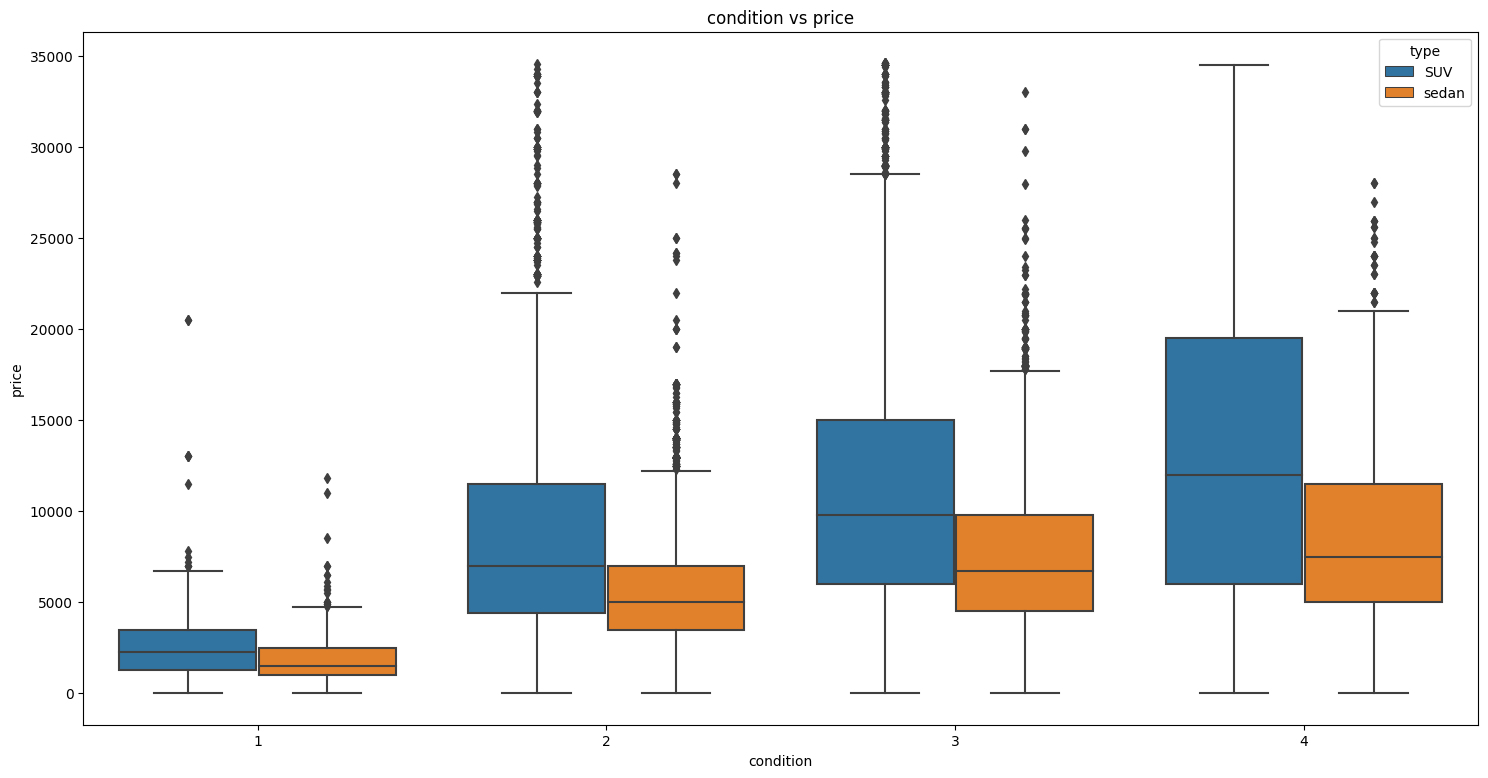

In [ ]:
# CONDICION VS PRECIO
fig = plt.figure(figsize=(18,9))
sns.boxplot(data=filtered_vehicles_type, y='price', x='condition', hue='type')
plt.title('condition vs price')
plt.show()

Se observa del gráfico que existe una dependencia del precio respecto al estado del vehículo. El precio es mayor cuando los vehículos son `excelent`, `good` y `like new` siendo los `like new` los que tienen el mayor precio en torno a los $5000 y $20000 para los tipos de vehículos `SUV` llegando incluso hasta los $35000 y en torno a los $5000 y $12000 para los vehículos `sedan`. Los vehículos tipo `SUV` son preferidos por los compradores.

Para los vehículos con estado `fair` los precios son bajos. Esto tiene sentido ya que mientras en mejor estado se encuentre un vehículo más elevado será su precio.

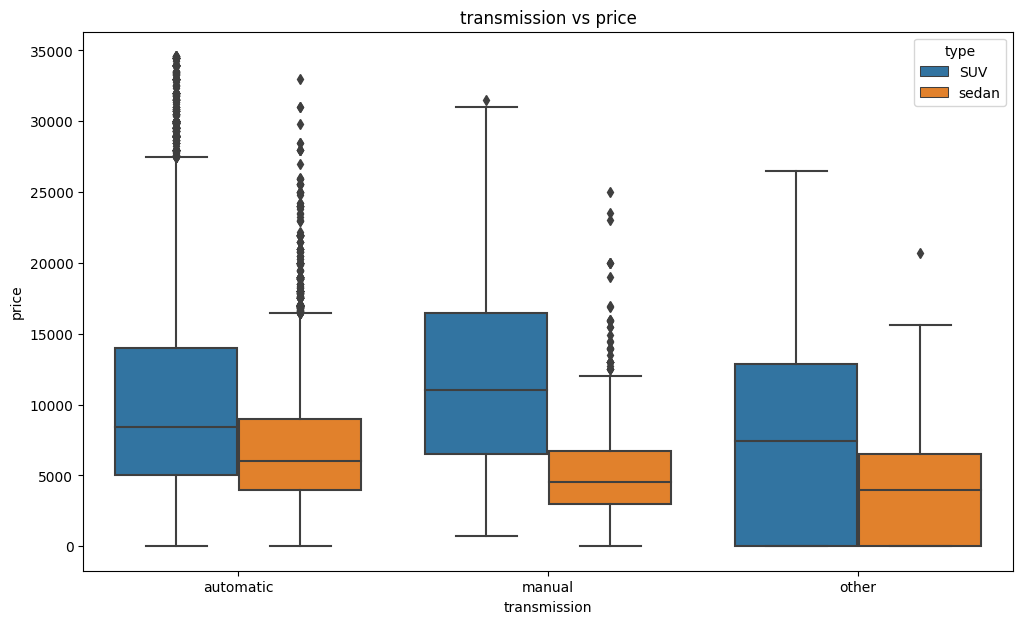

In [ ]:
# TRANSMISION VS PRECIO
fig = plt.figure(figsize=(12,7))
sns.boxplot(data=filtered_vehicles_type, y='price', x='transmission', hue='type')
plt.title('transmission vs price')
plt.show()

Se observa que los vehículos con tipo de transmisión `manual` tienen un precio más elevado respecto a los otros para el tipo de vehículo `SUV` mientras que para el vehículo `sedan` los de tipo automático tienen mayor precio.

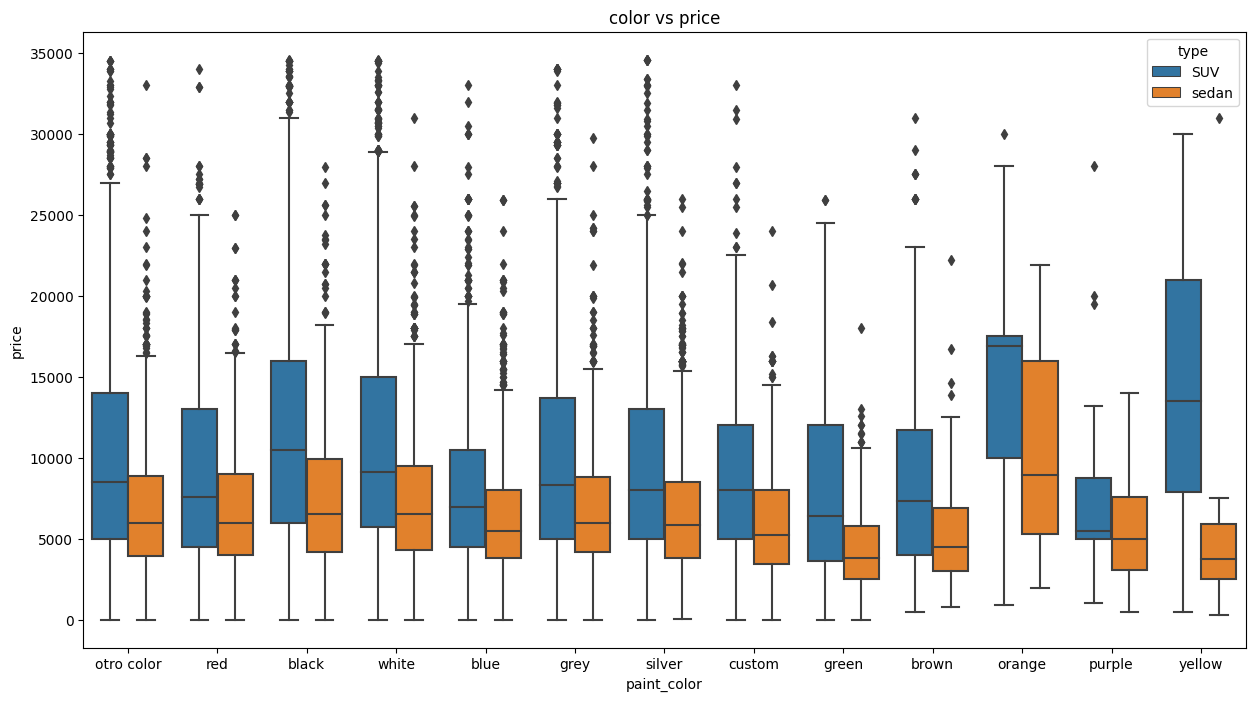

In [ ]:

fig = plt.subplots(figsize = (15, 8))
sns.boxplot(data=filtered_vehicles_type, y='price', x='paint_color', hue='type')
plt.title('color vs price')
plt.show()

Se observa que los vehículos de color `amarillo` y `naranja` son los que tienen un precio mayor para los tipos de vehículos `SUV`seguido por los de color `negro` y `blanco`. Los vehículos de menor precio son los de color `morado` y `azul`.

Respecto a los vehículos tipo `sedan`, los de color `naranja` son los que destacan por encima de los demás. Todos los otros colores para este tipo de vehículo se mantenienen casi igual siendo los colores `verde`, `marrón`, `morado` y `amarillo` los menos valorados.

Ahora mostraremos un diagrama de correlación y una matriz de correlación para ver la relación entre los datos para cada tipo de vehículo.

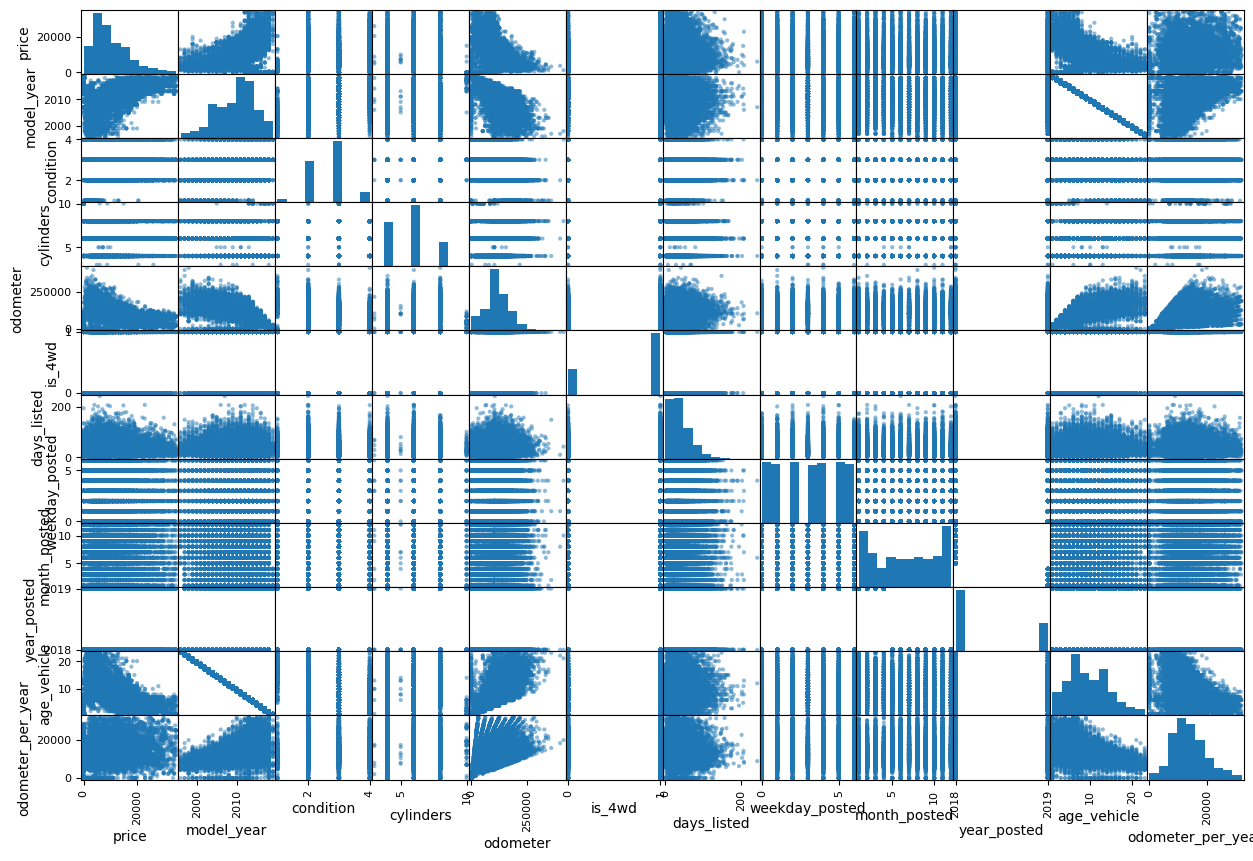

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5272\3547924335.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered_vehicles_type.corr()


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday_posted,month_posted,year_posted,age_vehicle,odometer_per_year
price,1.000000,0.517685,0.244466,0.120203,-0.430324,0.274802,-0.008782,0.004770,-0.018898,0.016601,-0.515328,0.147281
model_year,0.517685,1.000000,0.296619,-0.202598,-0.569083,-0.085414,-0.009696,-0.000883,-0.038753,0.037361,-0.994915,0.470708
condition,0.244466,0.296619,1.000000,-0.064697,-0.304514,-0.003661,-0.009409,0.004986,-0.005980,0.006571,-0.295565,0.004612
cylinders,0.120203,-0.202598,-0.064697,1.000000,0.163396,0.378079,0.012547,-0.007909,0.001793,-0.001677,0.202161,-0.044517
odometer,-0.430324,-0.569083,-0.304514,0.163396,1.000000,0.066857,0.012222,0.004932,0.015859,-0.009243,0.567400,0.322832
is_4wd,0.274802,-0.085414,-0.003661,0.378079,0.066857,1.000000,0.004199,0.004030,0.004929,-0.003235,0.084976,-0.006860
days_listed,-0.008782,-0.009696,-0.009409,0.012547,0.012222,0.004199,1.000000,0.003555,-0.006392,0.005550,0.010242,0.000409
weekday_posted,0.004770,-0.000883,0.004986,-0.007909,0.004932,0.004030,0.003555,1.000000,0.015000,-0.013645,-0.000493,0.004027
month_posted,-0.018898,-0.038753,-0.005980,0.001793,0.015859,0.004929,-0.006392,0.015000,1.000000,-0.820340,-0.043979,0.089956
year_posted,0.016601,0.037361,0.006571,-0.001677,-0.009243,-0.003235,0.005550,-0.013645,-0.820340,1.000000,0.063477,-0.108743


In [ ]:
#diagrama de correlación para el vehículo SUV
pd.plotting.scatter_matrix(filtered_vehicles_type[filtered_vehicles_type['type']=='SUV'], figsize=(15,10))
plt.show()

#matriz de correlación para el tipo de vehículo sedan
filtered_vehicles_type.corr()

Se observa de la gráfica y de la matriz de correlación que no existe una correlación muy fuerte entre los diferentes tipos de datos.

Se puede apreciar que las mejores correlaciones con respecto al precio para el vehículo `SUV` ocurren:
* correlación positiva: con el `model_year` ya que mientras ,ás reciente es el vehículo tiene un costo mayor.
* correlación negativa: con el `odometer` ya que mientras menos millaje de recorrido el costo es mayor.
* correlación negativa: con el `age_vehicle` ya que mientras menos antiguedad mas cuesta el vehículo.
* correlación positiva: con el `odometer_per_year`, esta correlación es baja de 0.14 lo que nos indica que el recorrido promedio anual del vehículo no influye tanto en el precio como si influye el recorrido total (`odometer`).

También se obseervan otras correlaciones, por ejemplo:
* correlación negativa casi perfecta de -0.99: entre la ``edad`` y el año de modelo (`model_year`) ya que mientras el año del modelo del vehículo es más reciente entonces menos antiguedad tiene el vehículo.
* correlación negativa: entre el el ``año de modelo y el odometer`` que mientras el año del modelo del vehículo es más reciente entonces menos recorrido tiene el vehículo.
* correlación positiva: entre la edad del vehículo y el millaje (`odometer`) ya que mientras más millaje tiene un carro es porque ha recorrido por mucho más tiempo.
* correlación negativa: entre la edad del vehículo y el millaje promedio anual (`odometer_per_year`) ya que mientras más edad tenga un carro menos kilómetros puede recorrer al año.

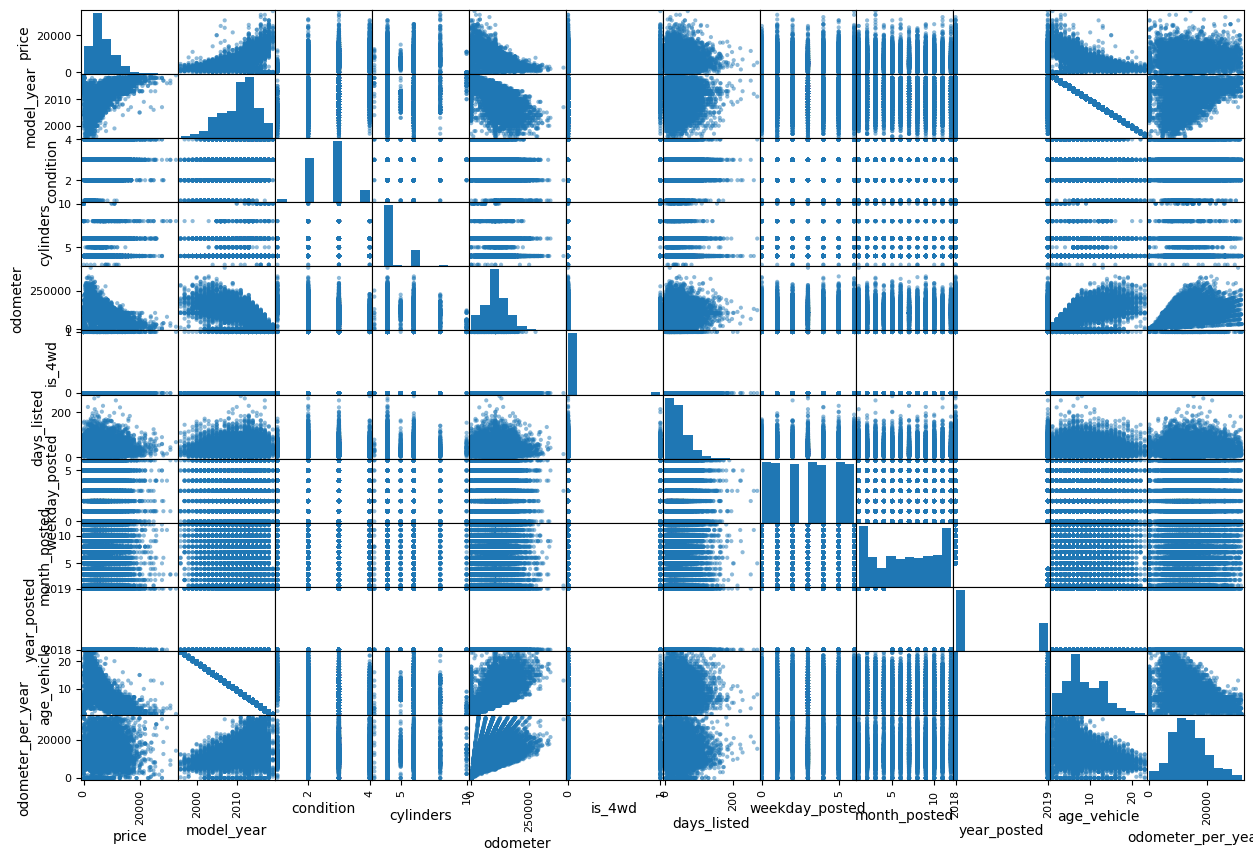

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday_posted,month_posted,year_posted,age_vehicle,odometer_per_year
price,1.000000,0.517685,0.244466,0.120203,-0.430324,0.274802,-0.008782,0.004770,-0.018898,0.016601,-0.515328,0.147281
model_year,0.517685,1.000000,0.296619,-0.202598,-0.569083,-0.085414,-0.009696,-0.000883,-0.038753,0.037361,-0.994915,0.470708
condition,0.244466,0.296619,1.000000,-0.064697,-0.304514,-0.003661,-0.009409,0.004986,-0.005980,0.006571,-0.295565,0.004612
cylinders,0.120203,-0.202598,-0.064697,1.000000,0.163396,0.378079,0.012547,-0.007909,0.001793,-0.001677,0.202161,-0.044517
odometer,-0.430324,-0.569083,-0.304514,0.163396,1.000000,0.066857,0.012222,0.004932,0.015859,-0.009243,0.567400,0.322832
is_4wd,0.274802,-0.085414,-0.003661,0.378079,0.066857,1.000000,0.004199,0.004030,0.004929,-0.003235,0.084976,-0.006860
days_listed,-0.008782,-0.009696,-0.009409,0.012547,0.012222,0.004199,1.000000,0.003555,-0.006392,0.005550,0.010242,0.000409
weekday_posted,0.004770,-0.000883,0.004986,-0.007909,0.004932,0.004030,0.003555,1.000000,0.015000,-0.013645,-0.000493,0.004027
month_posted,-0.018898,-0.038753,-0.005980,0.001793,0.015859,0.004929,-0.006392,0.015000,1.000000,-0.820340,-0.043979,0.089956
year_posted,0.016601,0.037361,0.006571,-0.001677,-0.009243,-0.003235,0.005550,-0.013645,-0.820340,1.000000,0.063477,-0.108743


In [ ]:
#diagrama de correlación para el vehículo sedan
pd.plotting.scatter_matrix(filtered_vehicles_type[filtered_vehicles_type['type']=='sedan'], figsize=(15,10))
plt.show()

#matriz de correlación para el tipo de vehículo sedan
filtered_vehicles_type.corr(numeric_only=True)


Se observa de la gráfica y de la matriz de correlación que no existe una correlación muy fuerte entre los diferentes tipos de datos.

Se puede apreciar que las mejores correlaciones con respecto al precio para el vehículo `sedan` ocurren:
* correlación positiva: con el `model_year` ya que mientras ,ás reciente es el vehículo tiene un costo mayor.
* correlación negativa: con el `odometer` ya que mientras menos millaje de recorrido el costo es mayor.
* correlación negativa: con el `age_vehicle` ya que mientras menos antiguedad mas cuesta el vehículo.
* correlación positiva: con el `odometer_per_year`, esta correlación es baja de 0.14 lo que nos indica que el recorrido promedio anual del vehículo no influye tanto en el precio como si influye el recorrido total (`odometer`).

También se obseervan otras correlaciones, por ejemplo:
* correlación negativa casi perfecta de -0.99: entre la ``edad`` y el año de modelo (`model_year`) ya que mientras el año del modelo del vehículo es más reciente entonces menos antiguedad tiene el vehículo.
* correlación negativa: entre el el ``año de modelo y el odometer`` que mientras el año del modelo del vehículo es más reciente entonces menos recorrido tiene el vehículo.
* correlación positiva: entre la edad del vehículo y el millaje (`odometer`) ya que mientras más millaje tiene un carro es porque ha recorrido por mucho más tiempo.
* correlación negativa: entre la edad del vehículo y el millaje promedio anual (`odometer_per_year`) ya que mientras más edad tenga un carro menos kilómetros puede recorrer al año.

## **CONCLUSIONES**
* Se identificaron 05 columnas con valores nulos `model_year`, `cylinders`, `odometers`, `paint_color` y `is_4wd` siendo la columna `is_4wd` la que tuvo más cantidad de valores nulos.
* Se identificaron tipos de datos incorrectos en las columnas `date_posted`, `cylinders`, `is_4wd` y `model_year` y fueron corregidos al tipo correcto.
* Se hizo un análisis cuidadose respecto a los valores nulos y se determino el porcentaje que representaban respecto al total. En base a ello se decidió reemplazar los nulos por la moda para las variables numéricas condicionadas a variables categóricas; por la ``mediana`` para odometer. Los valores nulos de `paint_color` fueron reemplazados por `otro color` y los nulos de `is_4wd` fueron reemplazados con `0`.
* Se añadieron dos columnas al dataframe, una de la edad del vehículo y otra del recorrido promedio anual. Esto con la finalidad de analizar su influencia en el precio.
* También se descompuso la fecha en `weekday, month y year` en columnas separadas en el mismo data frame.
* Se usaron bucles for y funciones para hacer más flexible el código y ahorrar líneas de código al hacer los gráficos de histogramas y algunos diagramas de caja.
* Se realizaron histogramas y digramas de caja para determinar los valores atípicos de los parámetros principales:
  * Precio
  * Los años del vehículo cuando el anuncio se colocó (age_vehicle)
  * Millaje (odometer_per_year)
  * Número de cilindros (cylinders)
  * Estado (condition)
  * transmisión (transmission)
  * color (paint_color)
 
  Se encontró que solamente habían valores atípicos en el ``precio, edad, millaje y condición``. Usando diagrama de cajas, el rango intercuartil y los mínimos y máximos se eliminaron los atípicos.
* Se determinó el periodo de colocación de los anuncios, se calculó la media, mediana, mínimo y máximo número de días de colocación identificando que el periodo de colocación habitual es de 39 dias.
* Se determinó el precio promedio por cada tipo de vehículo así como el número de anuncios por tipo de vehículo. Se seleccionaron para análisis de la influencia en el precio los vehículos `SUV` y `sedan` ya que tenían muchos más anuncios que los tros vehículos.
* Se hicieron diagrmas de caja para las variables categóricas y de dispersión para las numéricas y determinar la relación con el precio.
* Se utilizaron matrices de dispersión y correlación para estudiar si el precio depende de la edad, millaje, condición, tipo de transmisión y color. 

Del análisis realizado se concluye que el ``precio está influido`` (aunque no con mucha fuerza) ``por la edad del vehículo, el millaje recorrido, el estado del vehículo (los nuevos son los que cuestan más) y el tipo de transmisión (los tipos manuales influyen más). El color no influye mucho en el precio.``